<a href="https://colab.research.google.com/github/Tradergurl/final_project/blob/main/nltk_text_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re

pd.set_option('max_colwidth',400)

from wordcloud import WordCloud

In [2]:
df=pd.read_json('/content/drive/MyDrive/nlp/News_Category_Dataset_v2.json',lines=True)

In [3]:
df=df.drop(columns=['link','date','authors'])

In [4]:
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [5]:
def change_category(new_category, category_to_change):
  df.category = df.category.map(lambda x: new_category if x == category_to_change else x)

In [6]:
change_category('WORLDPOST','THE WORLDPOST')
change_category('WORLDPOST','WORLD NEWS')
change_category('ARTS & CULTURE','CULTURE & ARTS')
change_category('ARTS & CULTURE','ARTS')
change_category('STYLE & BEAUTY','STYLE')
change_category('ENTERTAINMENT','COMEDY')
change_category('FOOD & DRINK','TASTE')
change_category('ENVIRONMENT','GREEN')
change_category('WELLNESS','HEALTHY LIVING')

In [7]:
categories_to_drop=['LATINO VOICES','GOOD NEWS','FIFTY','RELIGION','WEIRD NEWS','DIVORCE','WOMEN','WEDDINGS','BLACK VOICES','QUEER VOICES','PARENTS','PARENTING','EDUCATION','COLLEGE']

In [8]:
df=df[df.category.isin(categories_to_drop)==False]

In [9]:
df.category.value_counts()

POLITICS          32739
WELLNESS          24521
ENTERTAINMENT     21233
STYLE & BEAUTY    11903
TRAVEL             9887
WORLDPOST          8420
FOOD & DRINK       8322
BUSINESS           5937
SPORTS             4884
HOME & LIVING      4195
ENVIRONMENT        3945
ARTS & CULTURE     3878
IMPACT             3459
CRIME              3405
MEDIA              2815
SCIENCE            2178
TECH               2082
MONEY              1707
Name: category, dtype: int64

In [10]:
df['text'] = df.headline+' '+df.short_description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
all_text=df['text'].values.tolist()

In [12]:
def clean_text(data):
  data=[word.lower() for word in data]
  data=[word.replace('new york','newyork') for word in data]
  #data=[word.replace('south korea','southkorea') for word in data]
  #data=[word.replace('north korea','northkorea') for word in data]
  data=[word.replace('the us','theus') for word in data]
  data=[word.replace('the u.s.','theus') for word in data]
  data=[word.replace('\'s','') for word in data]
  data=[word.replace('\'re','') for word in data]
  data=[word.replace('\'m','') for word in data]
  data=[word.replace('\'ll','') for word in data]
  data=[word.replace('\'ve','') for word in data]
  data=[word.replace('\'d','') for word in data]
  data=[word.replace('\'t','') for word in data]
  data=[re.sub(r'[^a-z ]','',word) for word in data]
  data = [word.replace('  ',' ') for word in data]

  return data
 

In [13]:
all_text = clean_text(all_text)

In [14]:
all_text[:3]

['there were mass shootings in texas last week but only on tv she left her husband he killed their children just another day in america',
 'will smith joins diplo and nicky jam for the world cup official song of course it has a song',
 'hugh grant marries for the first time at age the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony']

In [15]:
#check=' '.join(all_text)

In [16]:
import nltk
from nltk import word_tokenize
from nltk.classify import SklearnClassifier

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

import nltk
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
list_stop_words=list(STOPWORDS)

In [18]:
list_stop_words.sort()
list_stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
tokenized_text=[word_tokenize(line) for line in all_text]

In [20]:
text_nostop= [[word for word in text if word not in list_stop_words] for text in tokenized_text]

In [21]:
text_nostop[:3]

[['mass',
  'shootings',
  'texas',
  'last',
  'week',
  'tv',
  'left',
  'husband',
  'killed',
  'children',
  'another',
  'day',
  'america'],
 ['smith',
  'joins',
  'diplo',
  'nicky',
  'jam',
  'world',
  'cup',
  'official',
  'song',
  'course',
  'song'],
 ['hugh',
  'grant',
  'marries',
  'first',
  'time',
  'age',
  'actor',
  'longtime',
  'girlfriend',
  'anna',
  'eberstein',
  'tied',
  'knot',
  'civil',
  'ceremony']]

In [22]:
text_nostop_joint=[' '.join(element) for element in text_nostop]

In [23]:
text_nostop_joint[:5]

['mass shootings texas last week tv left husband killed children another day america',
 'smith joins diplo nicky jam world cup official song course song',
 'hugh grant marries first time age actor longtime girlfriend anna eberstein tied knot civil ceremony',
 'jim carrey blasts castrato adam schiff democrats new artwork actor gives dems asskicking fighting hard enough donald trump',
 'julianna margulies uses donald trump poop bags pick dog dietland actress said using bags really cathartic therapeutic moment']

# Wordcloud per category

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
df['cat']=df['category'].apply(lambda x:['No category'] if str(x)=='NaN' else str(x))

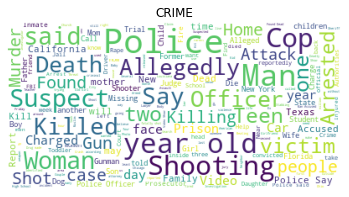

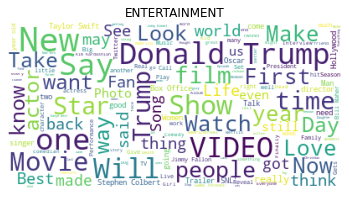

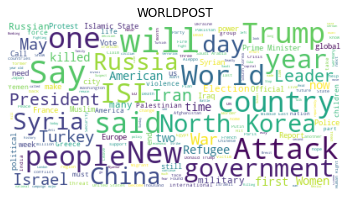

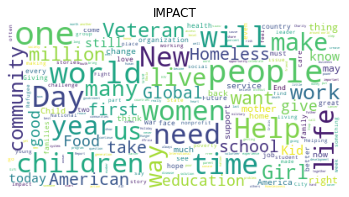

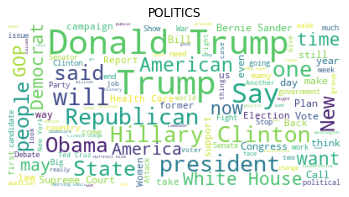

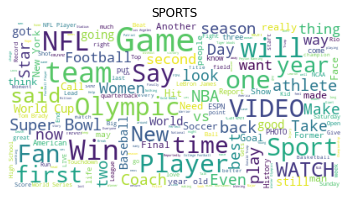

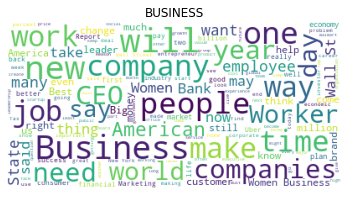

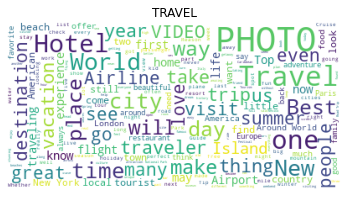

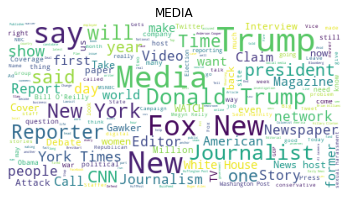

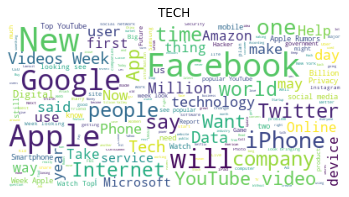

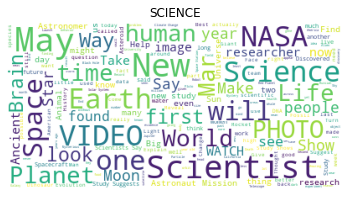

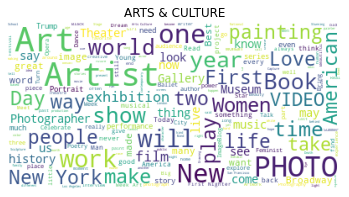

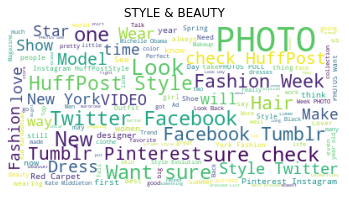

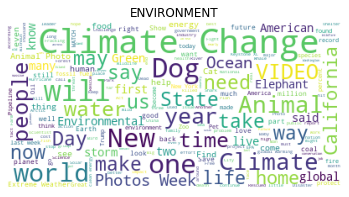

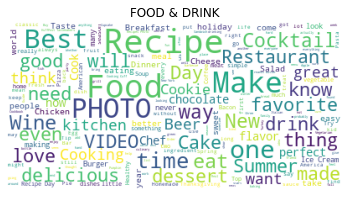

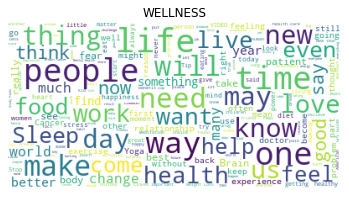

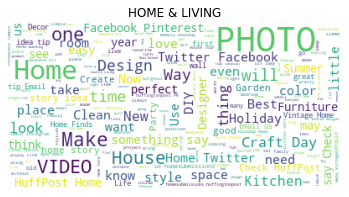

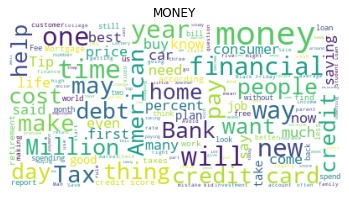

In [26]:
stopwords = set(STOPWORDS)

# generate word cloud and show it
for x in df.cat.unique():
	wc = WordCloud(background_color="white", max_words=200, stopwords=stopwords,
                   max_font_size=40, random_state=42)
	wc.generate(df.text[(df.text.notnull()) & (df.cat == x)].to_string())
	plt.imshow(wc)
	plt.title(x)
	plt.axis("off")
	plt.show()

# Stemming

In [29]:
from nltk.stem.porter import *

In [30]:
stemmer = PorterStemmer()

In [31]:
text_stemm= [[stemmer.stem(word) for word in text ] for text in text_nostop]


In [32]:
text_stemm[:3]

[['mass',
  'shoot',
  'texa',
  'last',
  'week',
  'tv',
  'left',
  'husband',
  'kill',
  'children',
  'anoth',
  'day',
  'america'],
 ['smith',
  'join',
  'diplo',
  'nicki',
  'jam',
  'world',
  'cup',
  'offici',
  'song',
  'cours',
  'song'],
 ['hugh',
  'grant',
  'marri',
  'first',
  'time',
  'age',
  'actor',
  'longtim',
  'girlfriend',
  'anna',
  'eberstein',
  'tie',
  'knot',
  'civil',
  'ceremoni']]

In [33]:
text_stemm_joint=[' '.join(line) for line in text_stemm ]

# Lemmatization

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
text_lemma=[[lemmatizer.lemmatize(word) for word in text]for text in text_nostop]

In [38]:
text_lemma[:3]

[['mass',
  'shooting',
  'texas',
  'last',
  'week',
  'tv',
  'left',
  'husband',
  'killed',
  'child',
  'another',
  'day',
  'america'],
 ['smith',
  'join',
  'diplo',
  'nicky',
  'jam',
  'world',
  'cup',
  'official',
  'song',
  'course',
  'song'],
 ['hugh',
  'grant',
  'marries',
  'first',
  'time',
  'age',
  'actor',
  'longtime',
  'girlfriend',
  'anna',
  'eberstein',
  'tied',
  'knot',
  'civil',
  'ceremony']]

In [39]:
text_lemma_joint=[' '.join(line) for line in text_lemma]

In [47]:
import itertools

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion


from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier


# Bag of words

In [41]:
bow=CountVectorizer(min_df=5, max_df=0.3)
bow2=CountVectorizer(min_df=5, max_df=0.3, ngram_range=(1,2))

In [42]:
#text bow stemm
bow.fit(text_stemm_joint)
text_bow=bow.transform(text_stemm_joint)
#text bow lemma
bow.fit(text_lemma_joint)
text_bow_lemma=bow.transform(text_lemma_joint)

In [43]:
#text bow stem (1,2)
bow2.fit(text_stemm_joint)
text_bow2=bow2.transform(text_stemm_joint)
#text bow lemma (1,2)
bow2.fit(text_lemma_joint)
text_bow2_lemma=bow2.transform(text_lemma_joint)

# TFIDF

In [44]:
tfidf=TfidfVectorizer(min_df=5, max_df=0.3)

In [45]:
tfidf.fit(text_stemm_joint)
text_tfidf_stemm=tfidf.transform(text_stemm_joint)
tfidf.fit(text_lemma_joint)
text_tfidf_lemma=tfidf.transform(text_lemma_joint)

# Models

In [49]:
nb_model=MultinomialNB()
lr= LogisticRegression()
sgdc_model= SGDClassifier()
rfc=RandomForestClassifier()

# Naive Bayes

In [50]:
nb_model= MultinomialNB()

## Bag of words ngram (1,1) stemmed data 

In [51]:
X_train,X_test,y_train,y_test= train_test_split(text_bow,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [52]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [53]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_bow_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7831984361067289
ACC test set: 0.7276608879057564


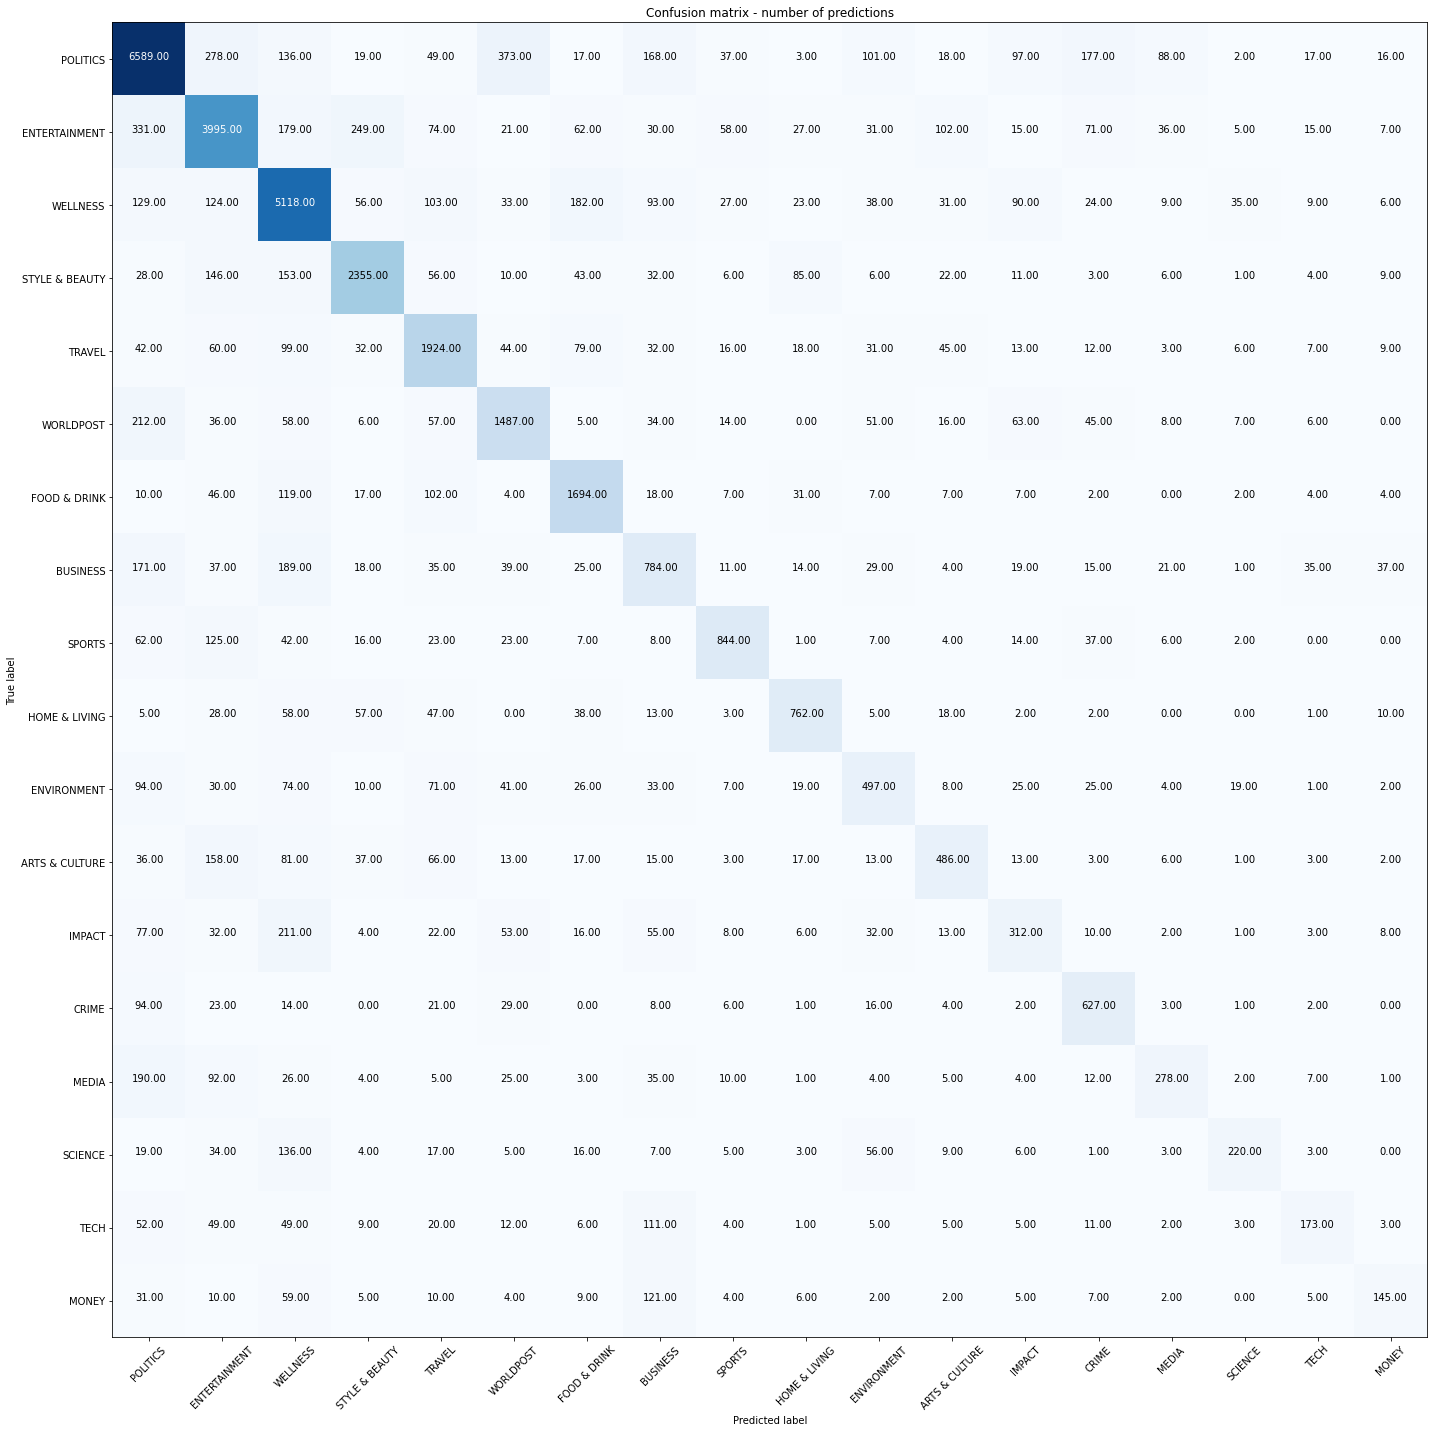

In [54]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,2) stemmed data 

In [55]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [56]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [57]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow2_train_accuracy = accuracy_score(y_train, y_pred_train)
nb_bow2_test_accuracy = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8122384937238494
ACC test set: 0.7332681722310819


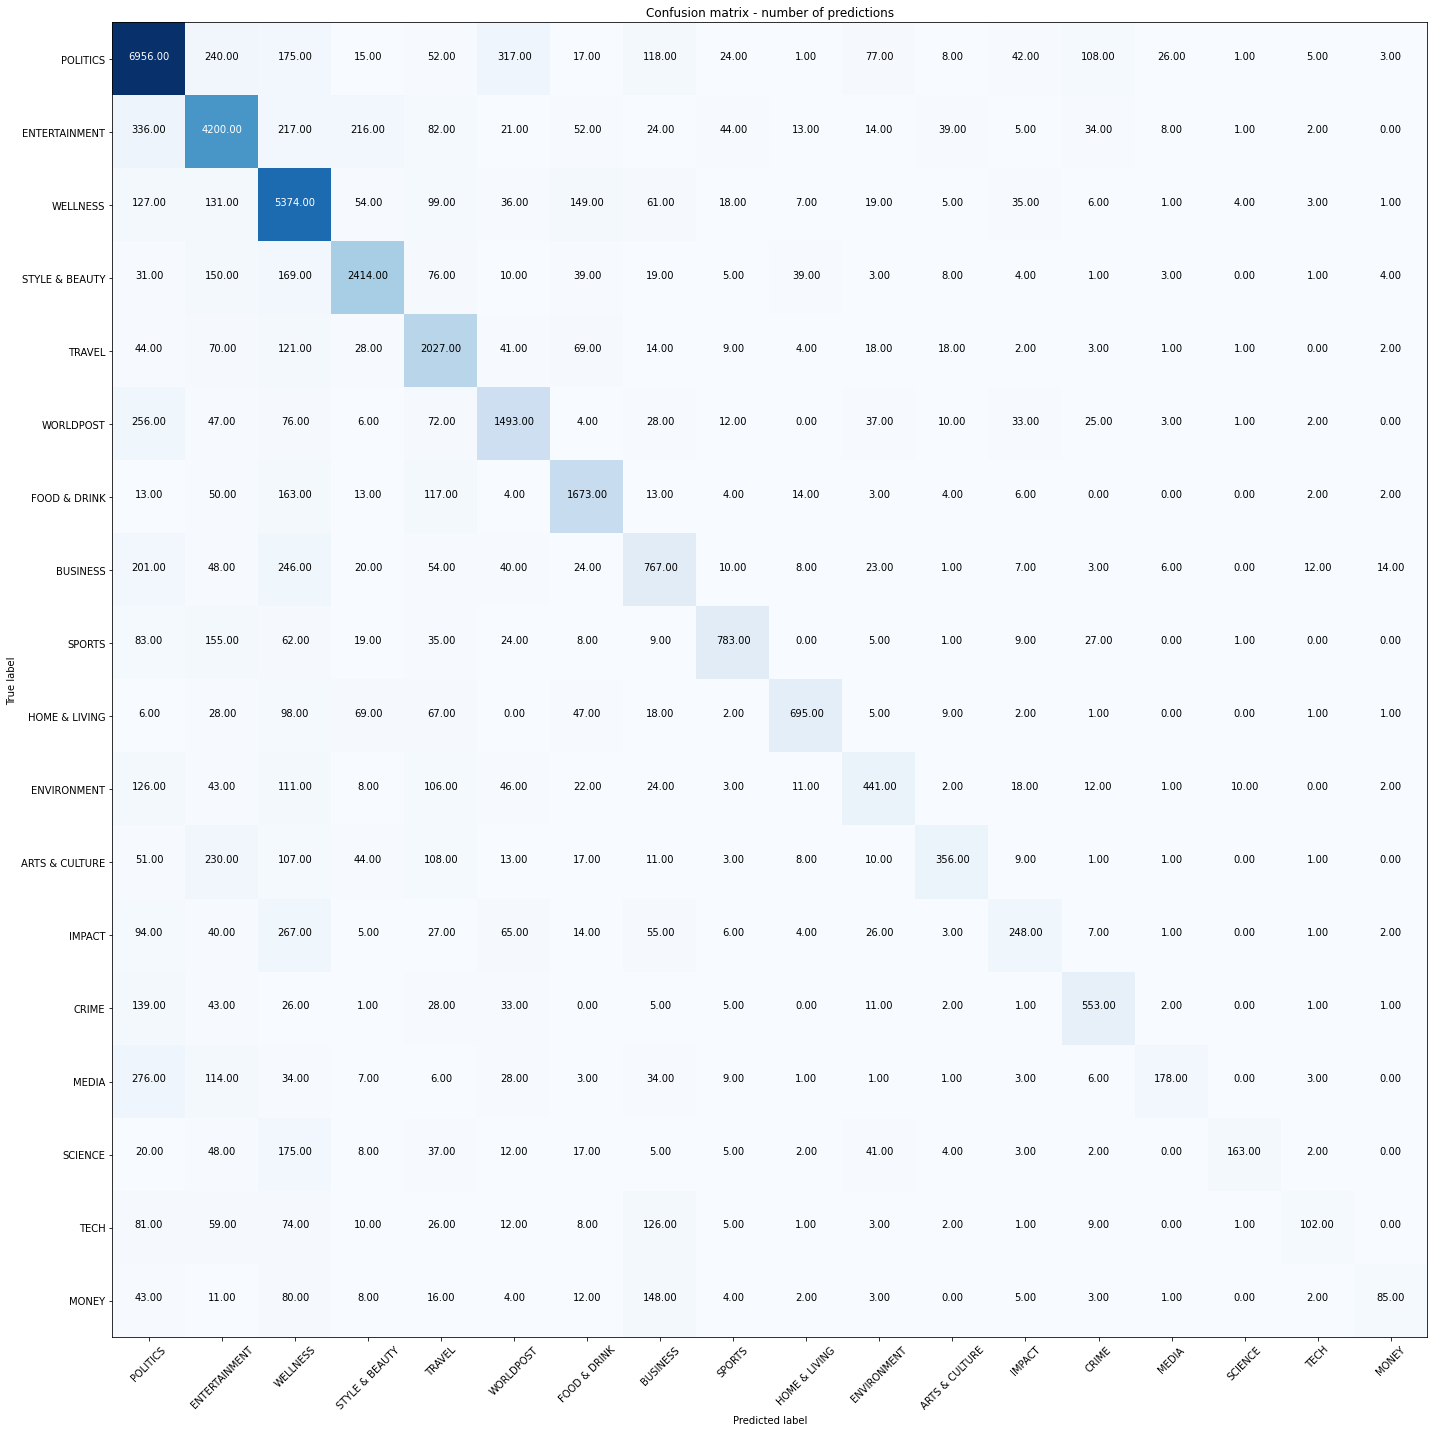

In [58]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,1) lemmatized data

In [59]:
X_train,X_test,y_train,y_test= train_test_split(text_bow_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [60]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [61]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow_lemma_train_acc = accuracy_score(y_train, y_pred_train)
nb_bow_lemma_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7950305233555114
ACC test set: 0.7321107052831936


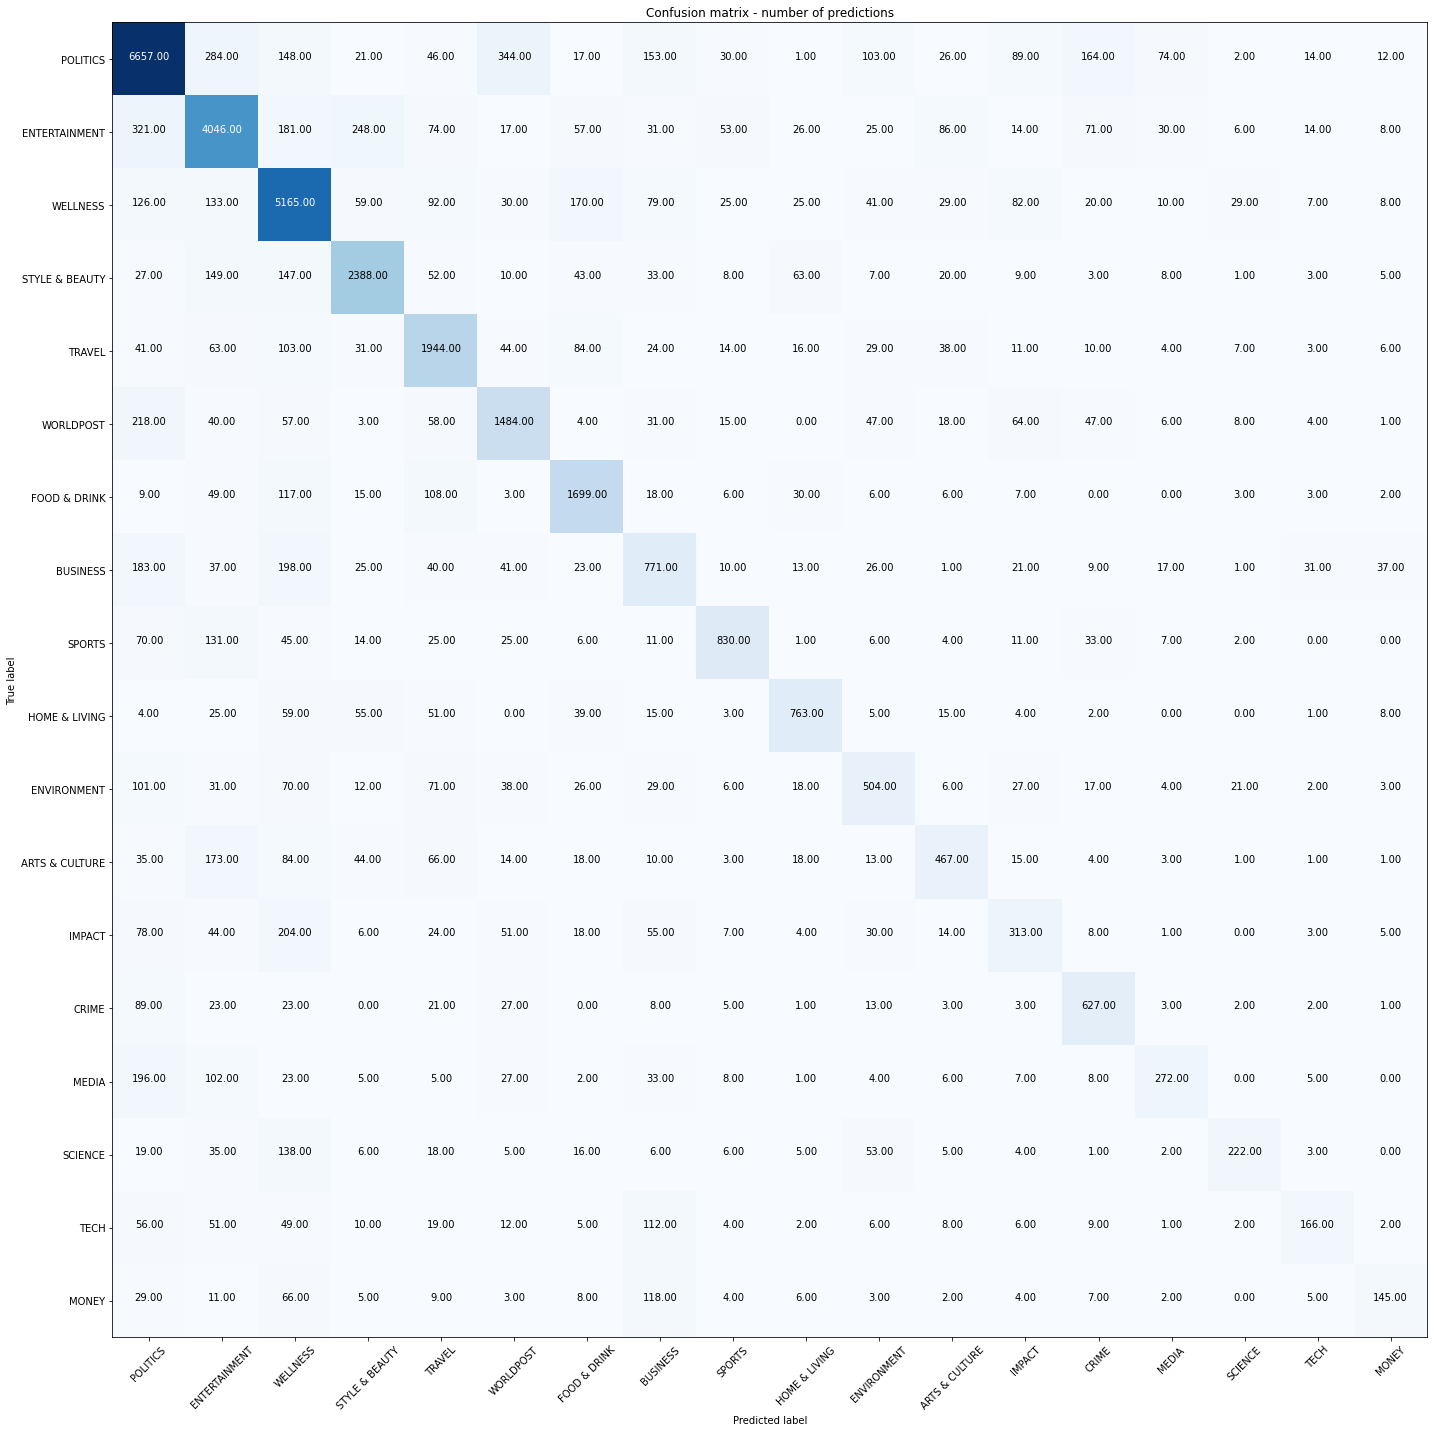

In [62]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,2) lemmatized data

In [63]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [64]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [65]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_bow2_lemma_train_acc = accuracy_score(y_train, y_pred_train)
nb_bow2_lemma_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8184546265175938
ACC test set: 0.7358403210041669


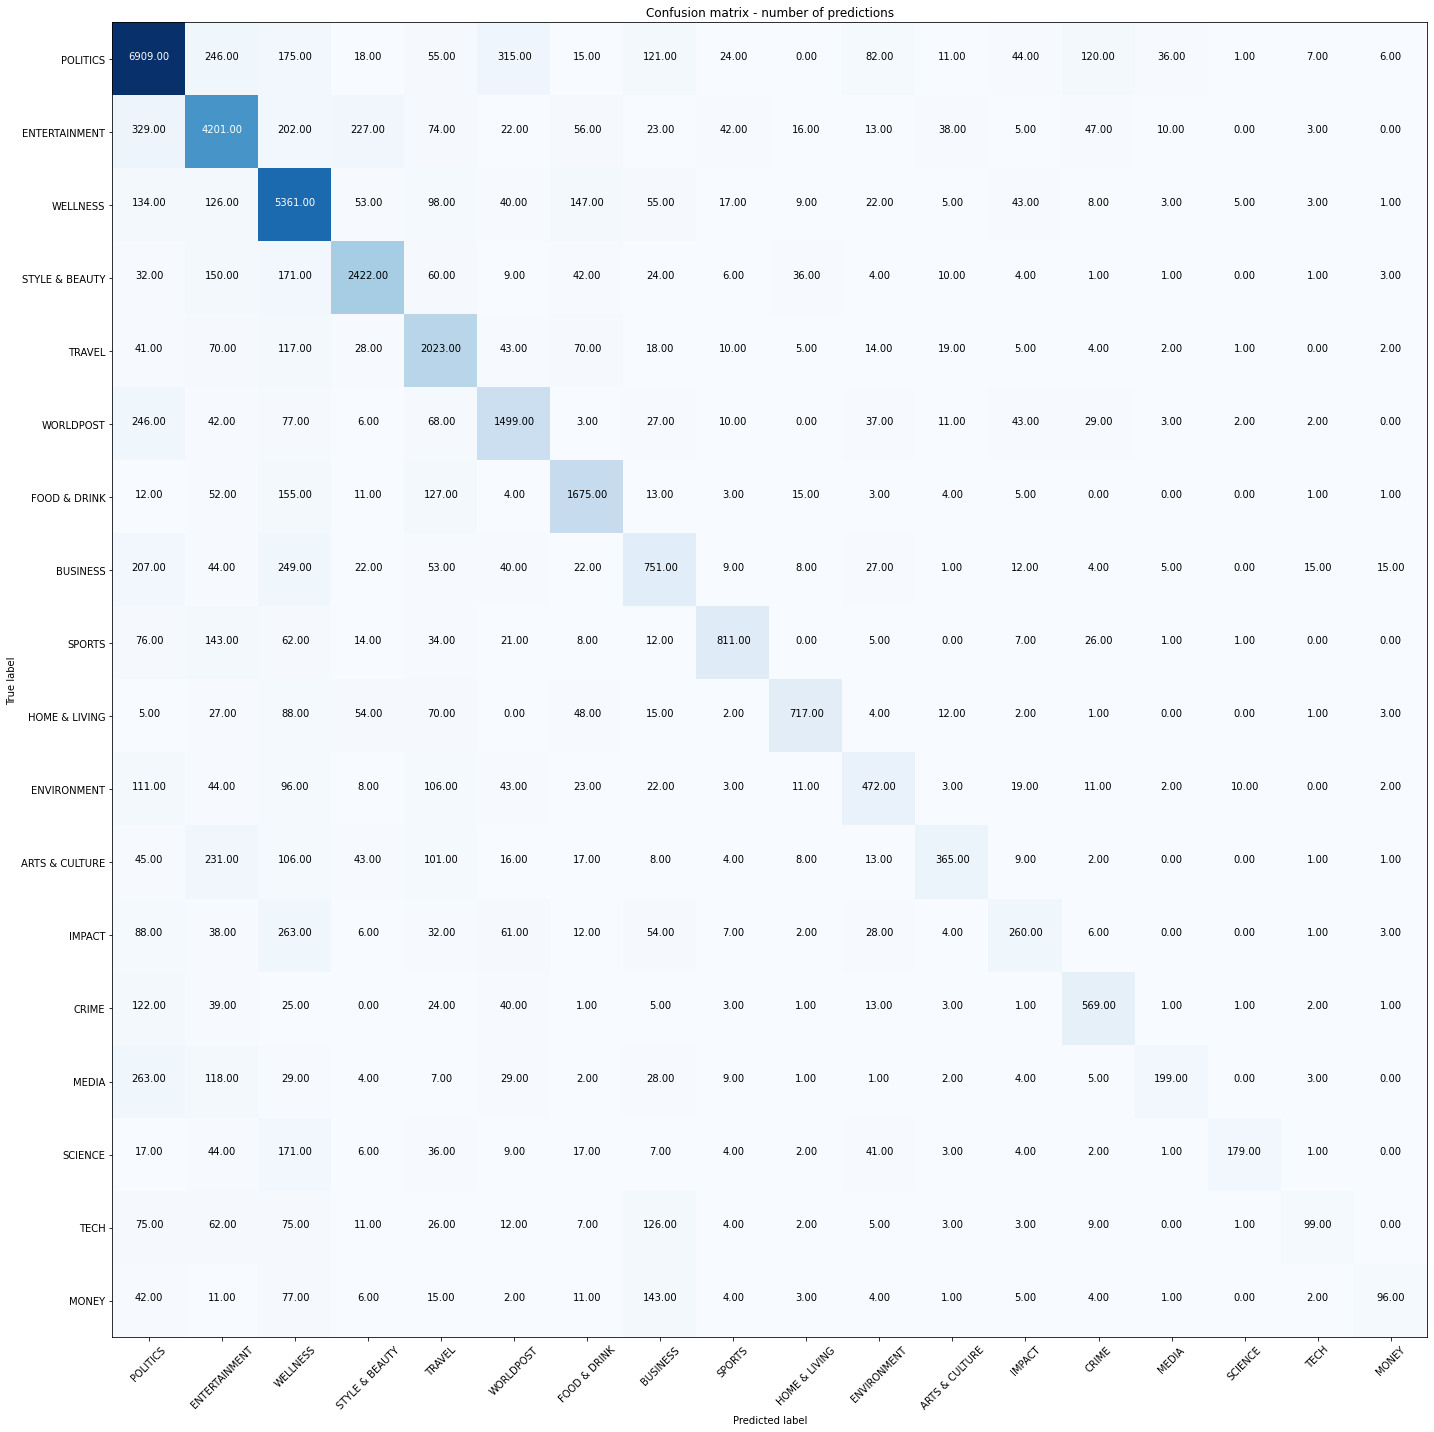

In [66]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## TFIDF stemmed data

In [67]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf_stemm,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [68]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [69]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_tfidf_stem_train = accuracy_score(y_train, y_pred_train)
nb_tfidf_stem_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.681613965292544
ACC test set: 0.6490045784248161


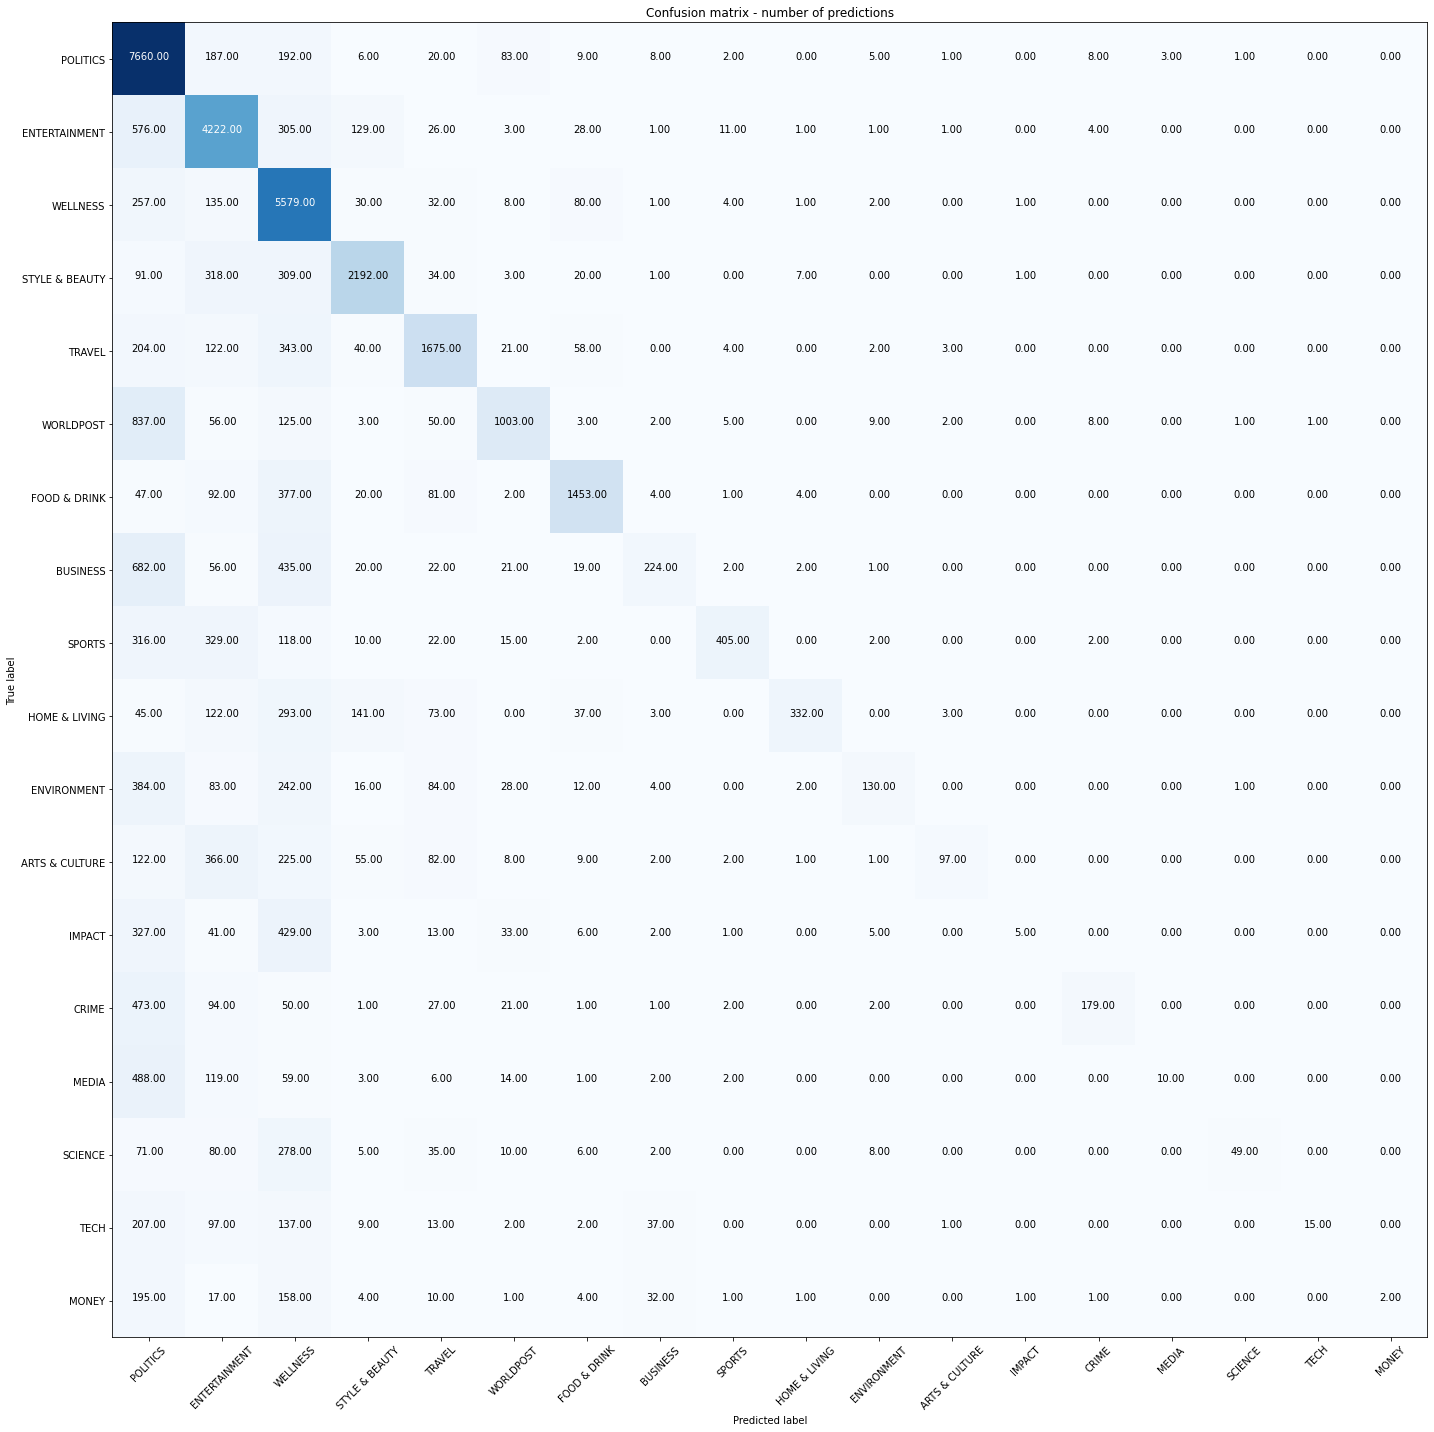

In [70]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## TFIDF lemmatized data

In [71]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [72]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [73]:
y_pred_train=nb_model.predict(X_train)
y_pred_test=nb_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

nb_tfidf_lemma_train = accuracy_score(y_train, y_pred_train)
nb_tfidf_lemma_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.6822398655600521
ACC test set: 0.6456350635320747


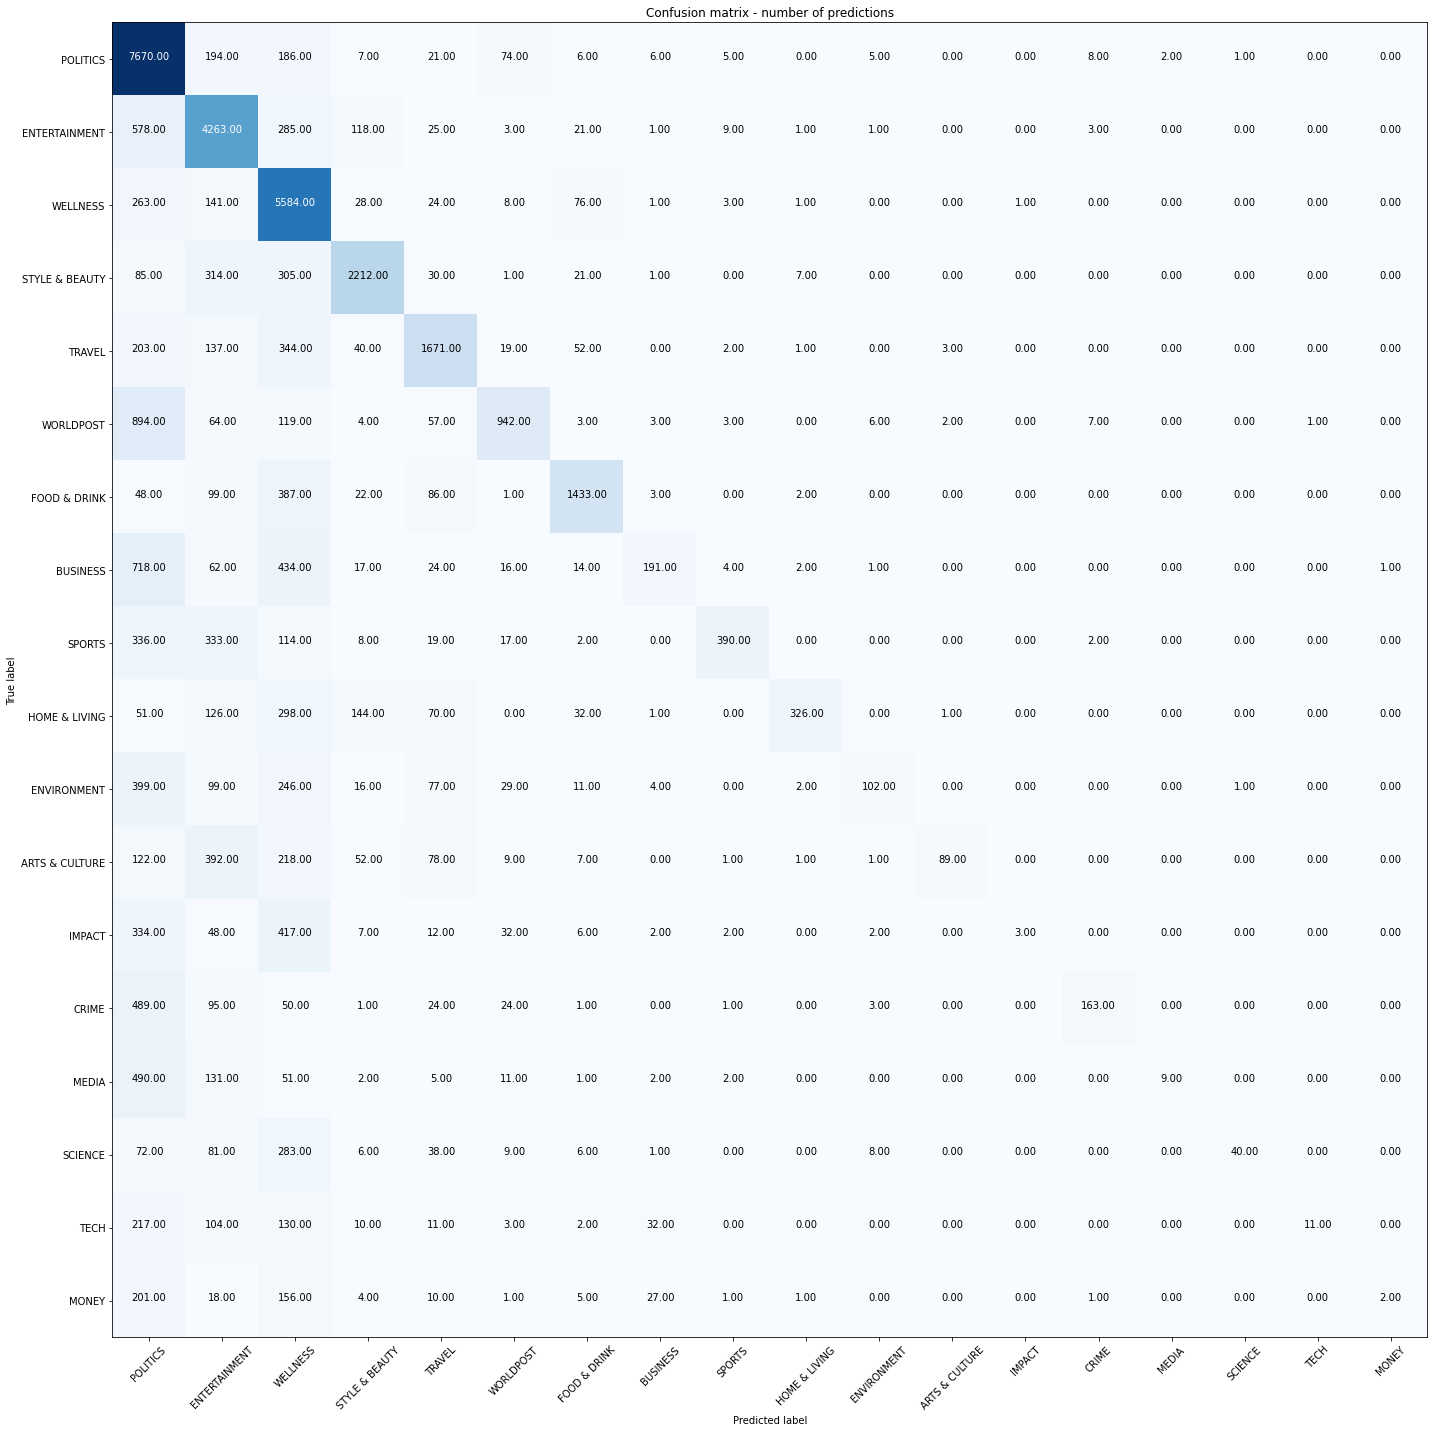

In [74]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Logistic Regression

In [75]:
lr= LogisticRegression()

## Bag of words ngram (1,1) stemmed data

In [76]:
X_train,X_test,y_train,y_test= train_test_split(text_bow,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [77]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_bow_stemm_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_bow_stemm_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9037914123053707
ACC test set: 0.723108184577396


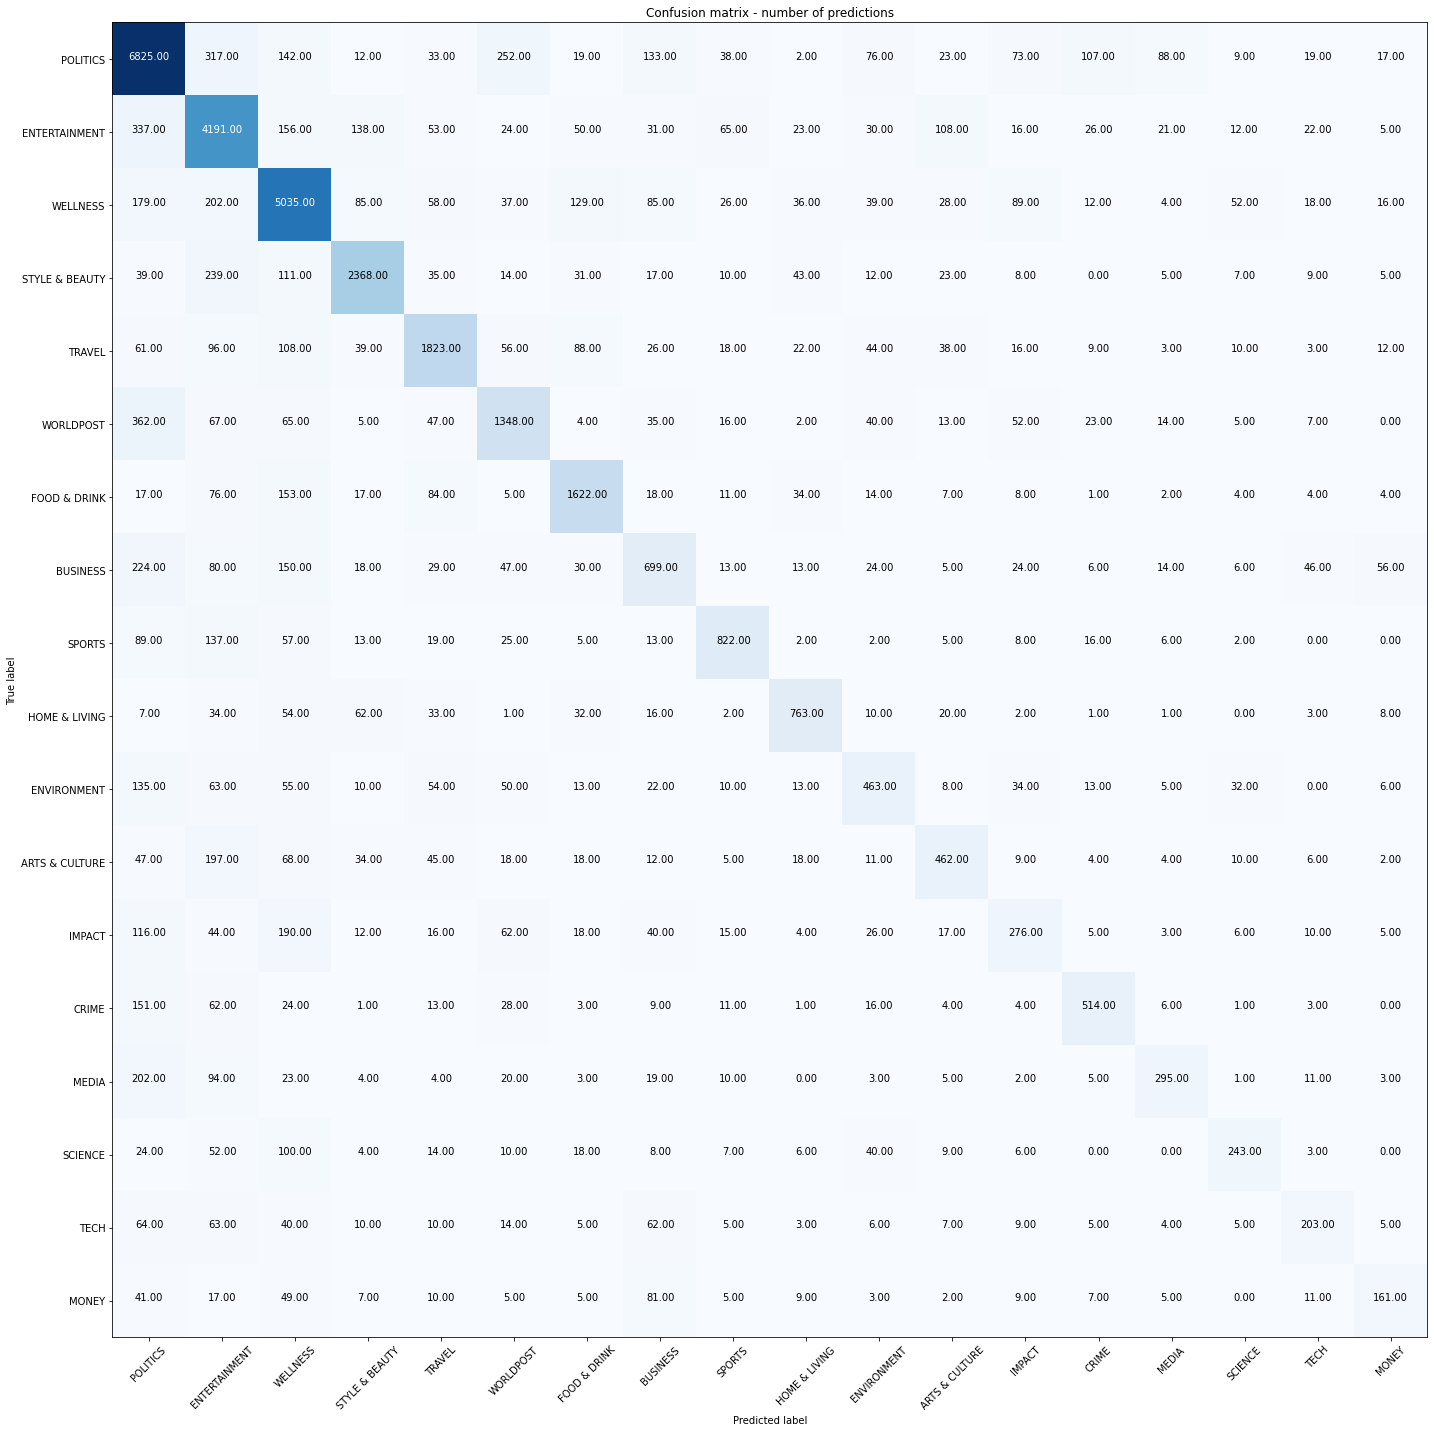

In [79]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,2) stemmed data

In [80]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [81]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [82]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_bow2_stemm_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_bow2_stemm_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9755727416146512
ACC test set: 0.7400329235042955


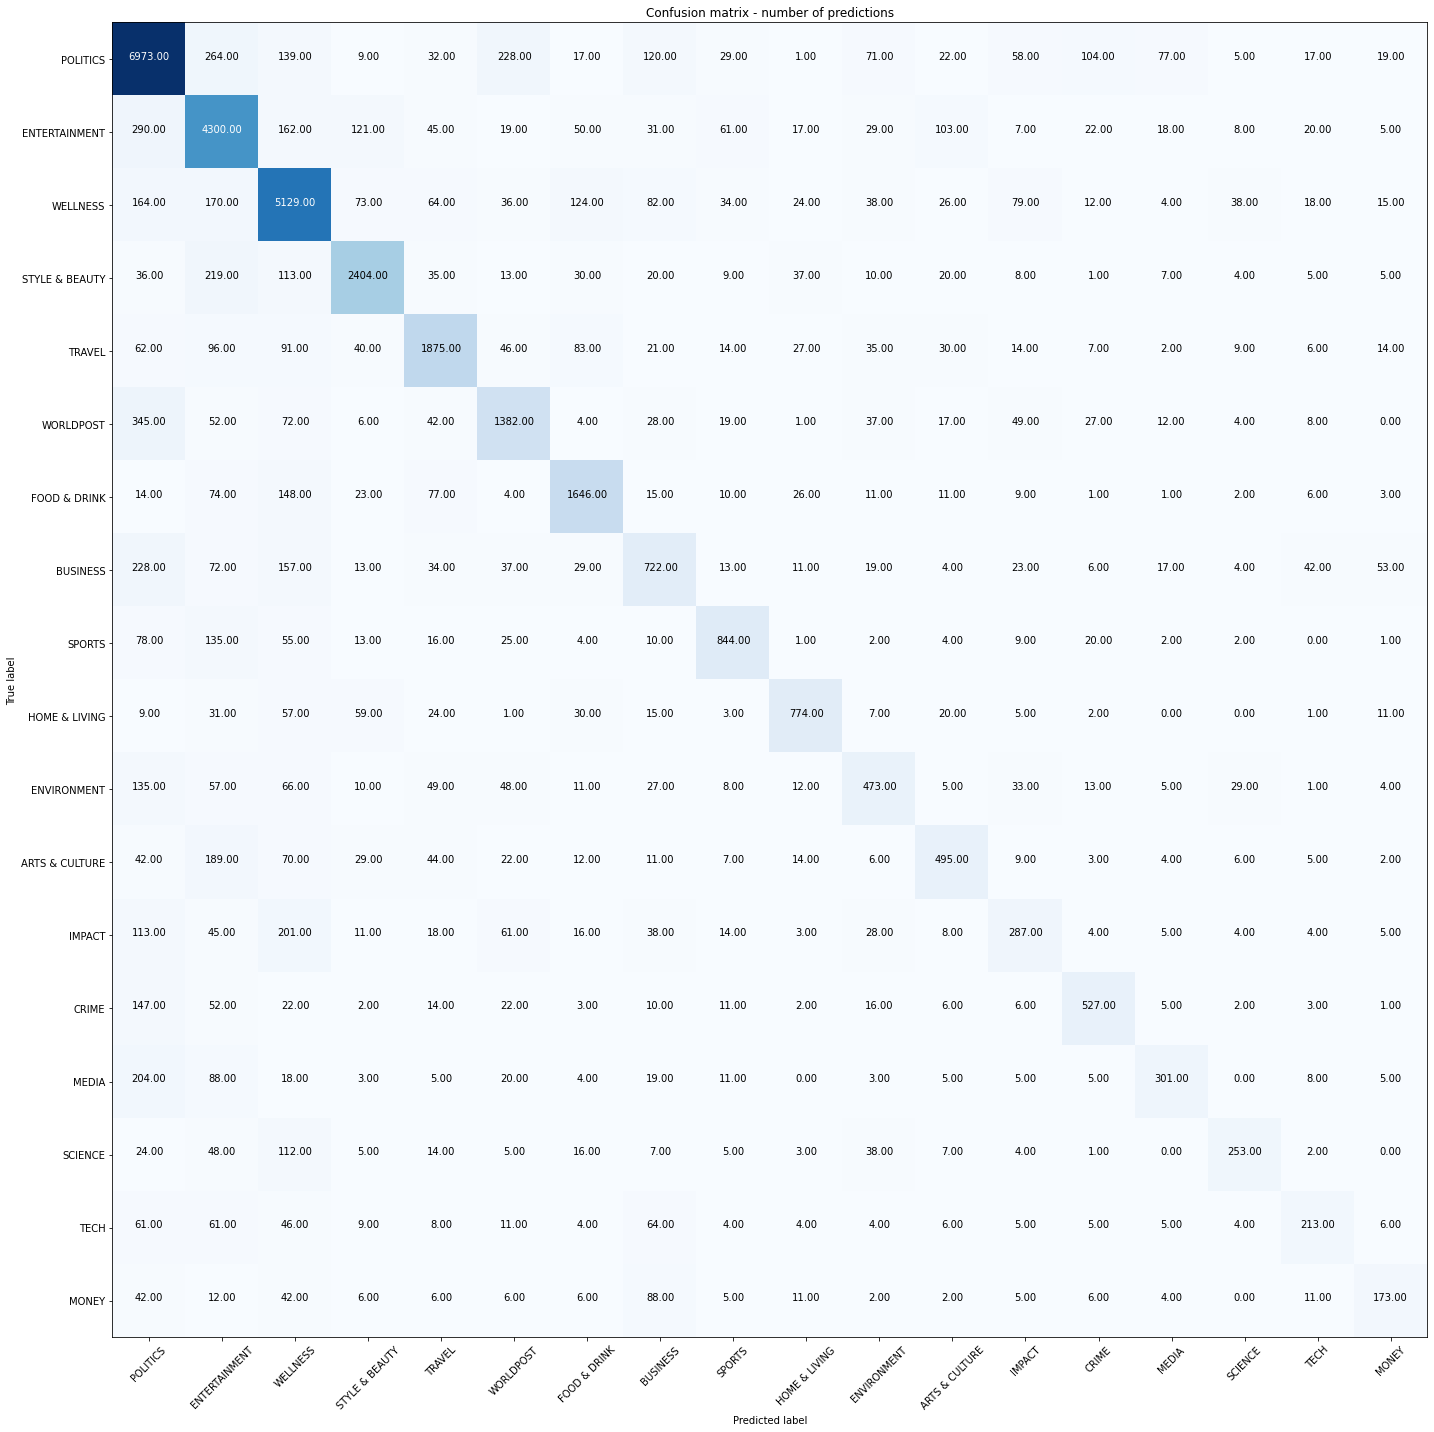

In [83]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,1) lemmatized data

In [84]:
X_train,X_test,y_train,y_test= train_test_split(text_bow_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [85]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [86]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_bow_lemma_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_bow_lemma_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9280471911653748
ACC test set: 0.7258346622768661


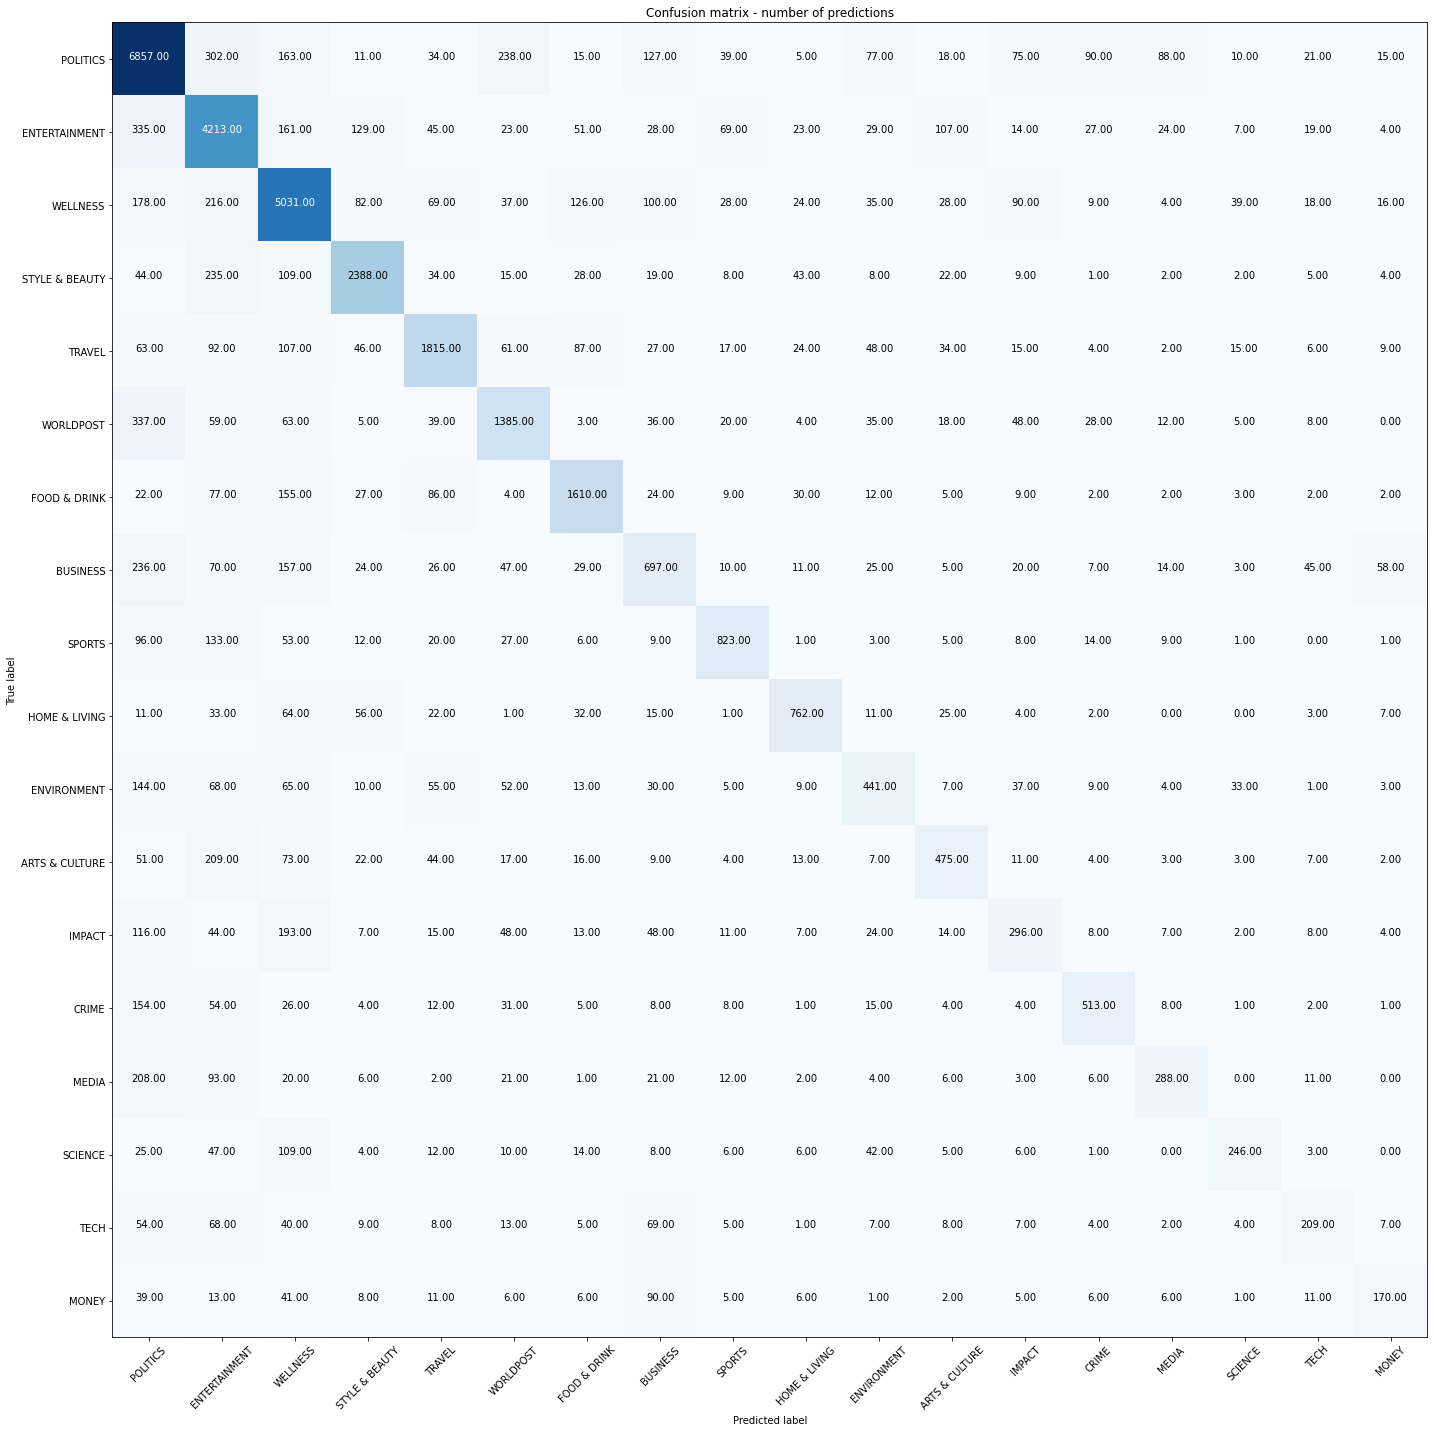

In [87]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words on ngram (1,2) lemmatized data

In [88]:
X_train,X_test,y_train,y_test= train_test_split(text_bow_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [89]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [90]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_bow2_lemma_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_bow2_lemma_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.9280471911653748
ACC test set: 0.7258346622768661


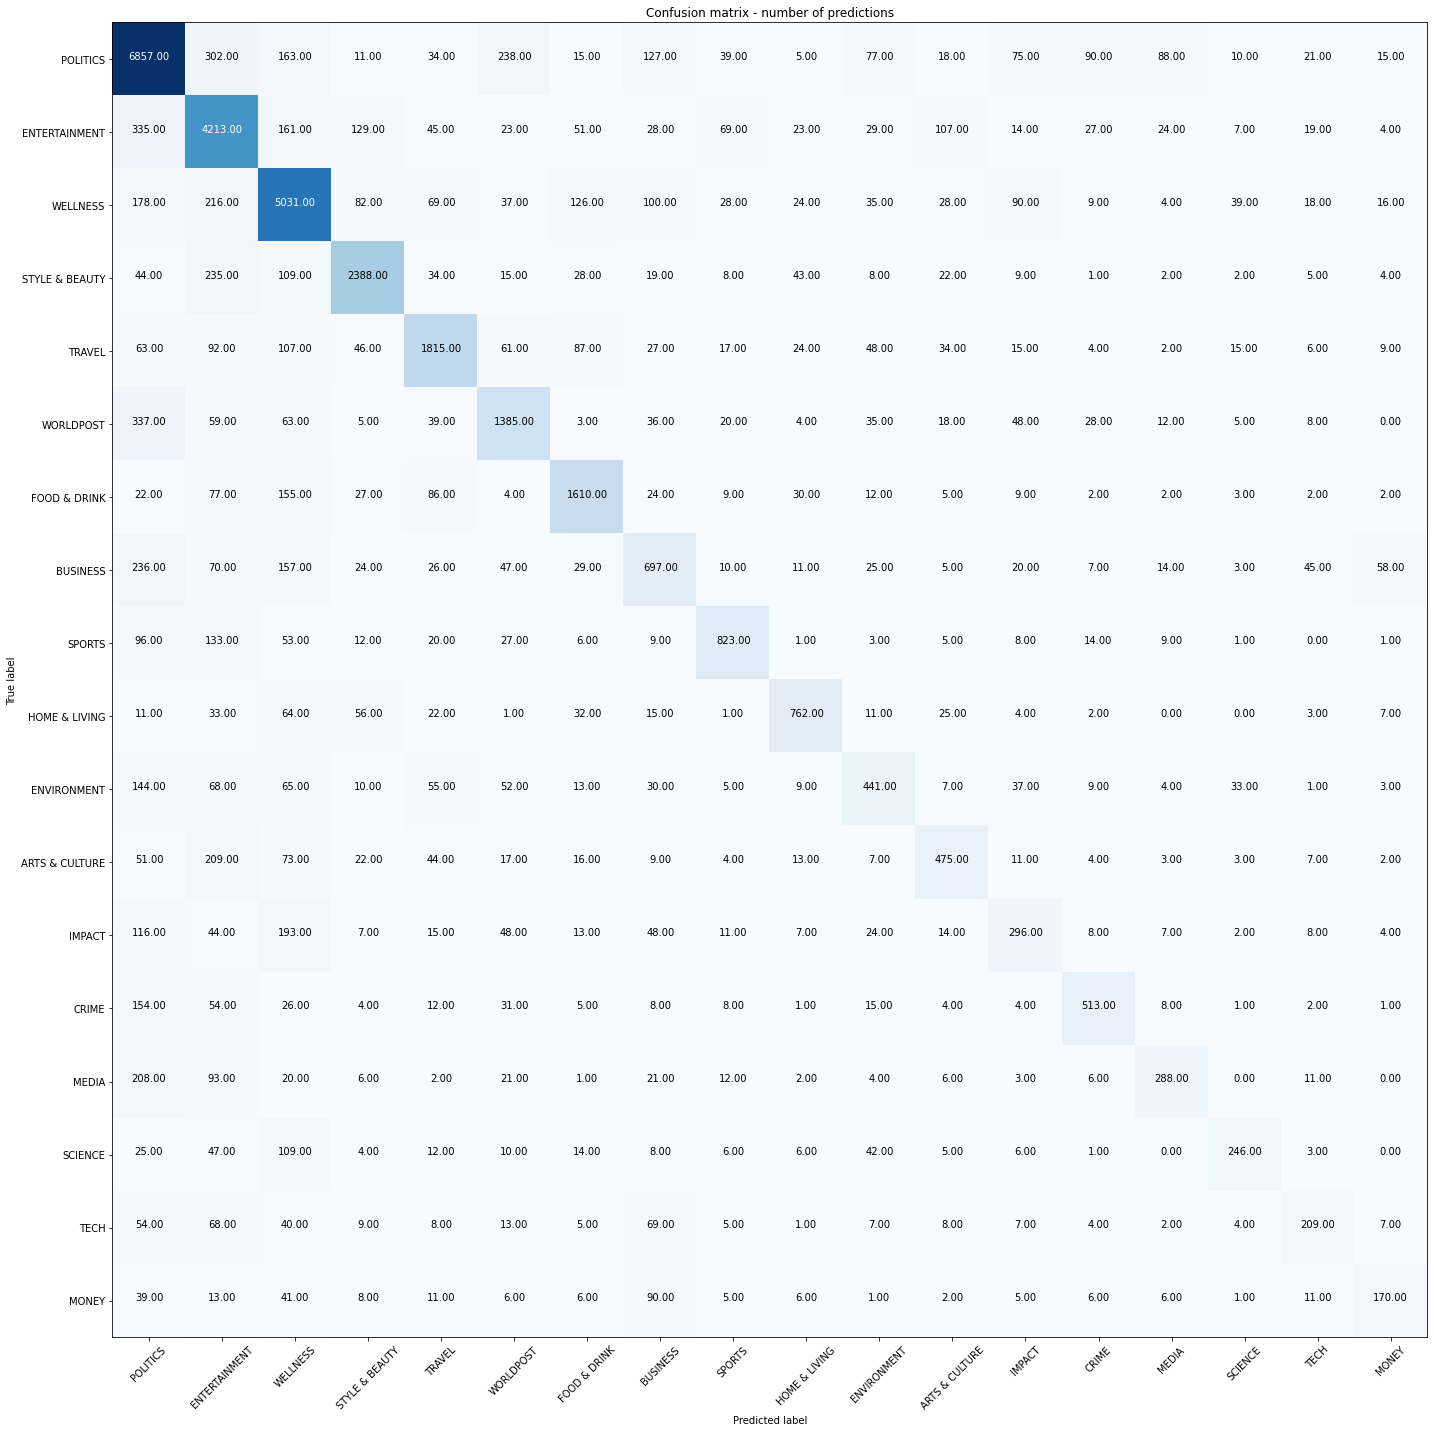

In [91]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## TFIDF Stemmed data

In [92]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf_stemm,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [93]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [94]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_tfidf_stemm_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_tfidf_stemm_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.79571644145689
ACC test set: 0.7376408251453264


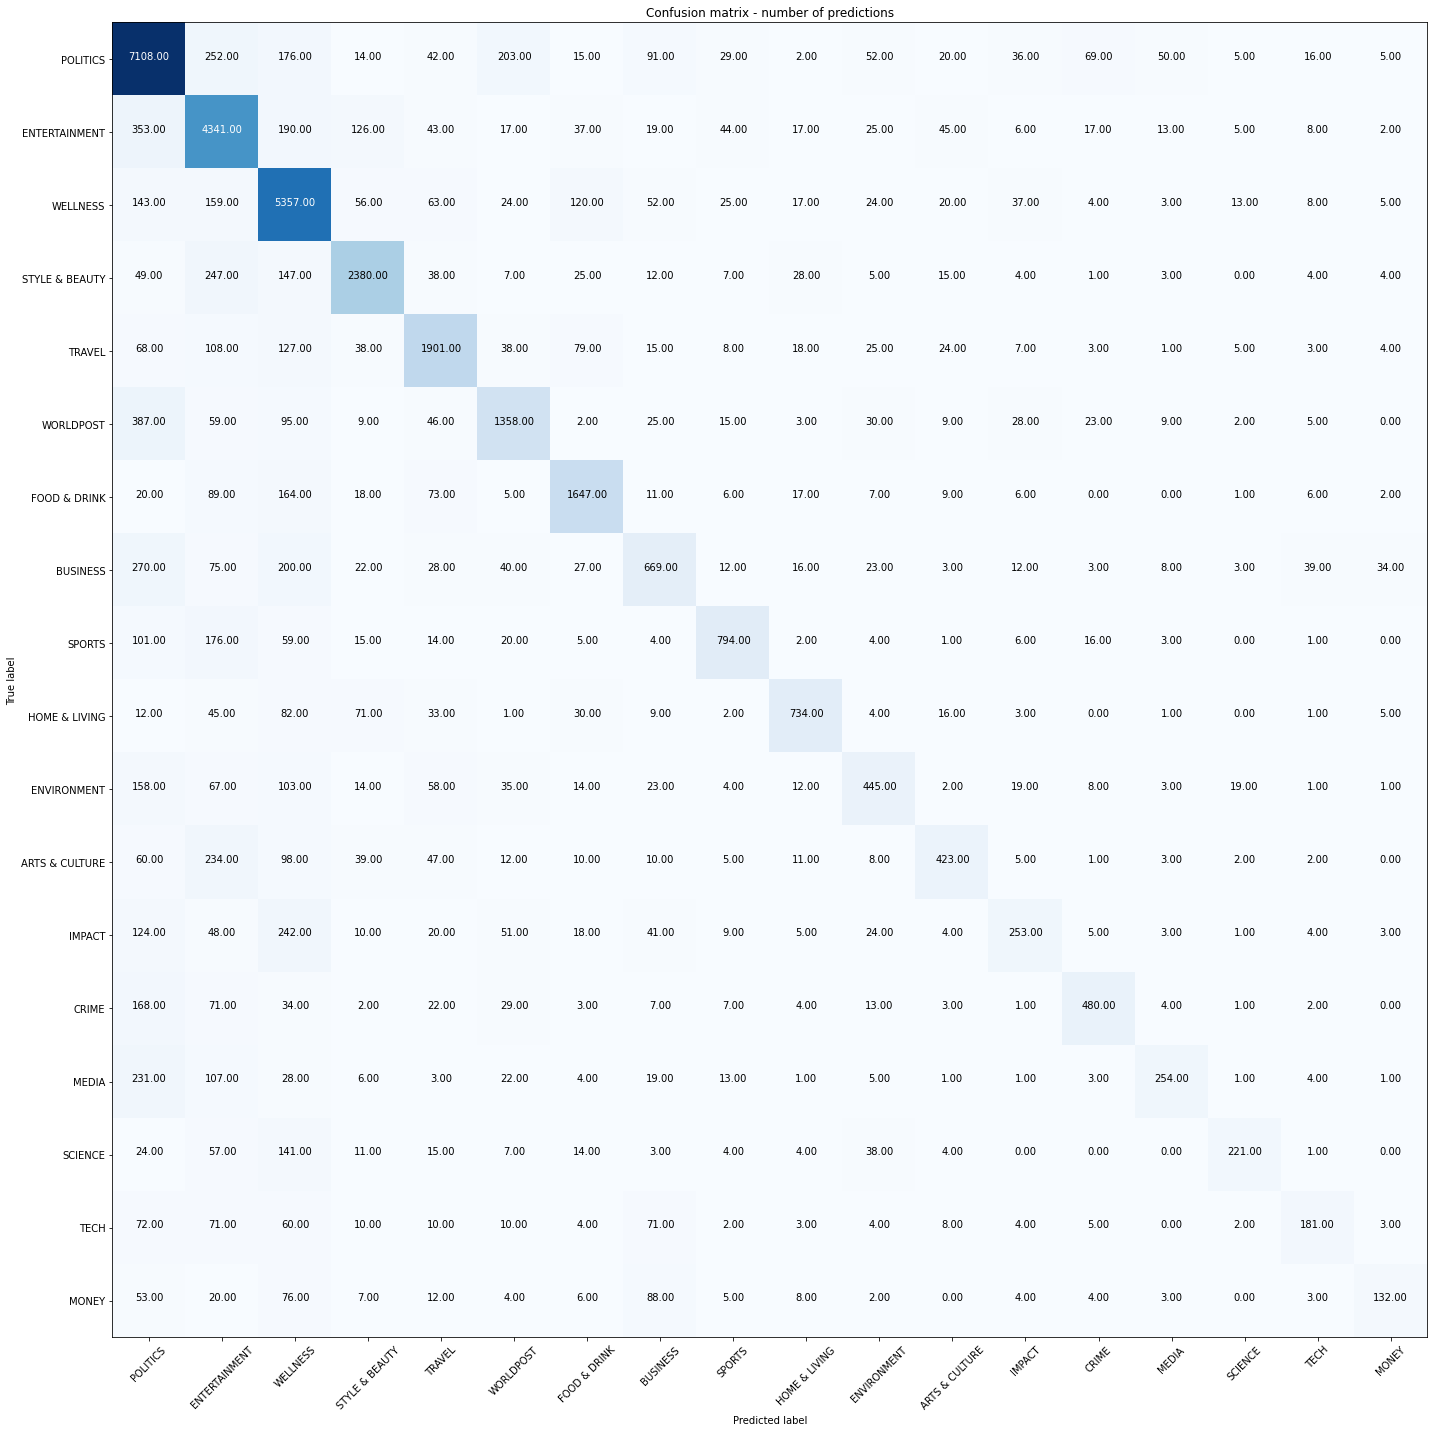

In [95]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## TFIDF Lemmatized data

In [96]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [97]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [98]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

log_reg_tfidf_lemma_acc_train = accuracy_score(y_train, y_pred_train)
log_reg_tfidf_lemma_acc_test = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8010666026476438
ACC test set: 0.7397499871392561


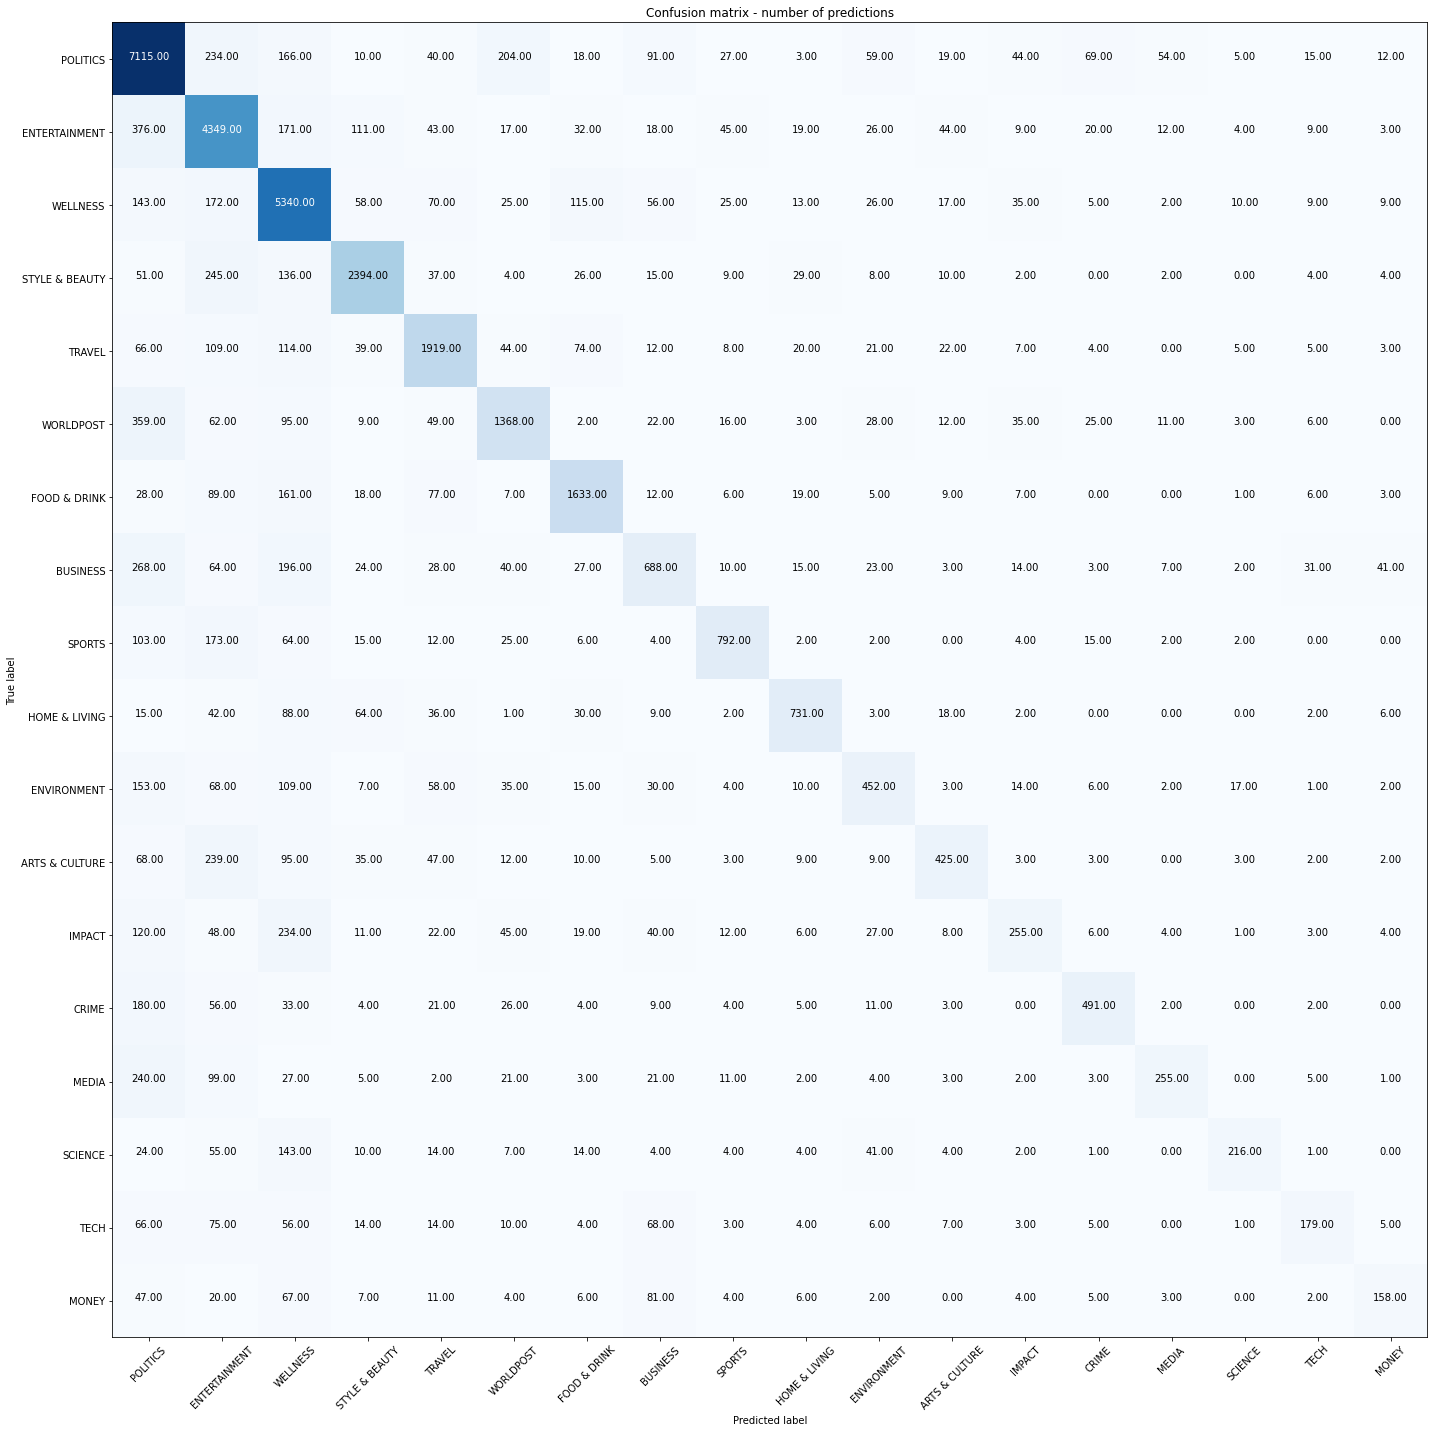

In [99]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Random Forest

## On stemmed data

In [103]:

X_train,X_test,y_train,y_test= train_test_split(text_bow2,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [104]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [105]:
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

rfc_bow2_stem_acc_train = accuracy_score(y_train, y_pred_train)
rfc_bow2_stem_acc_test =  accuracy_score(y_test, y_pred_test)

ACC train set: 0.9997685026407847
ACC test set: 0.6668552909100263


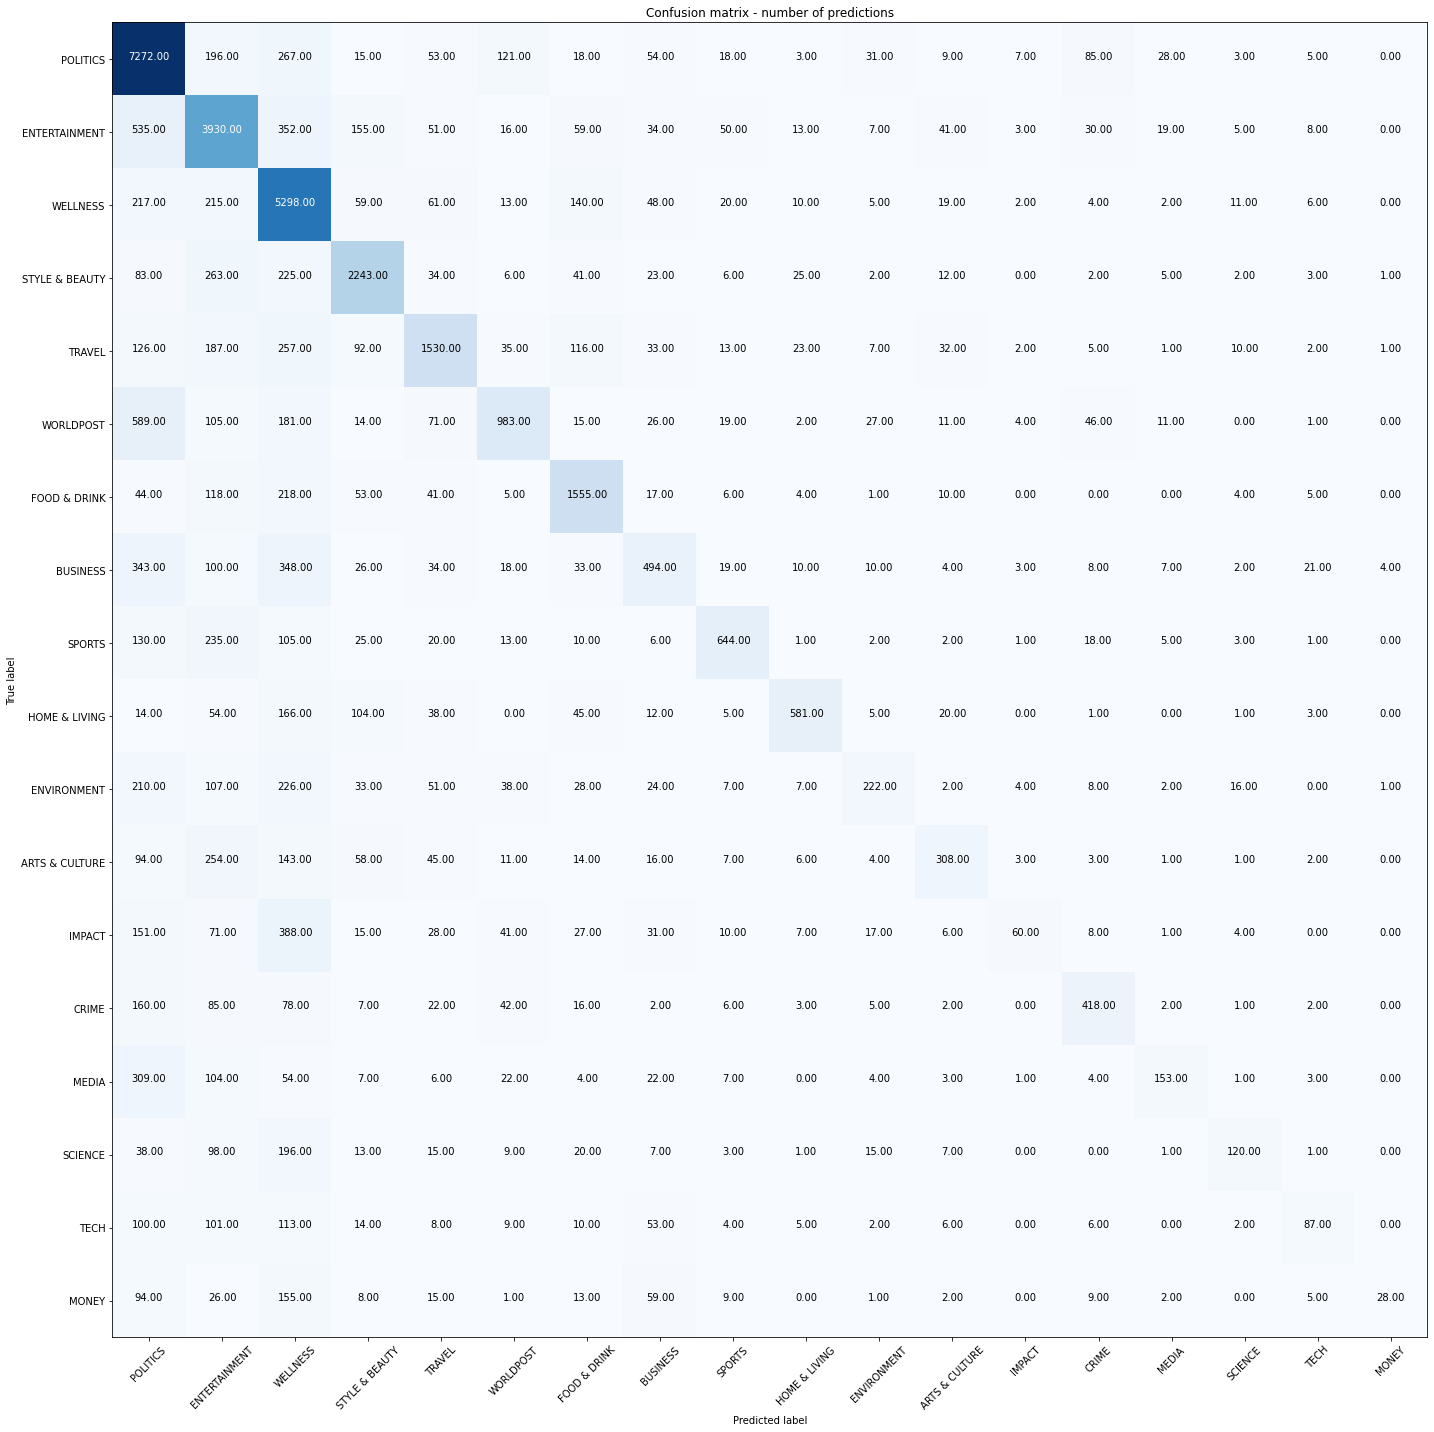

In [106]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## On lemmatized data

In [110]:

X_train,X_test,y_train,y_test= train_test_split(text_bow2_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

rfc_bow2_lemma_acc_train = accuracy_score(y_train, y_pred_train)
rfc_bow2_lemma_acc_test =  accuracy_score(y_test, y_pred_test)

ACC train set: 0.9997513546882503
ACC test set: 0.6661093677658316


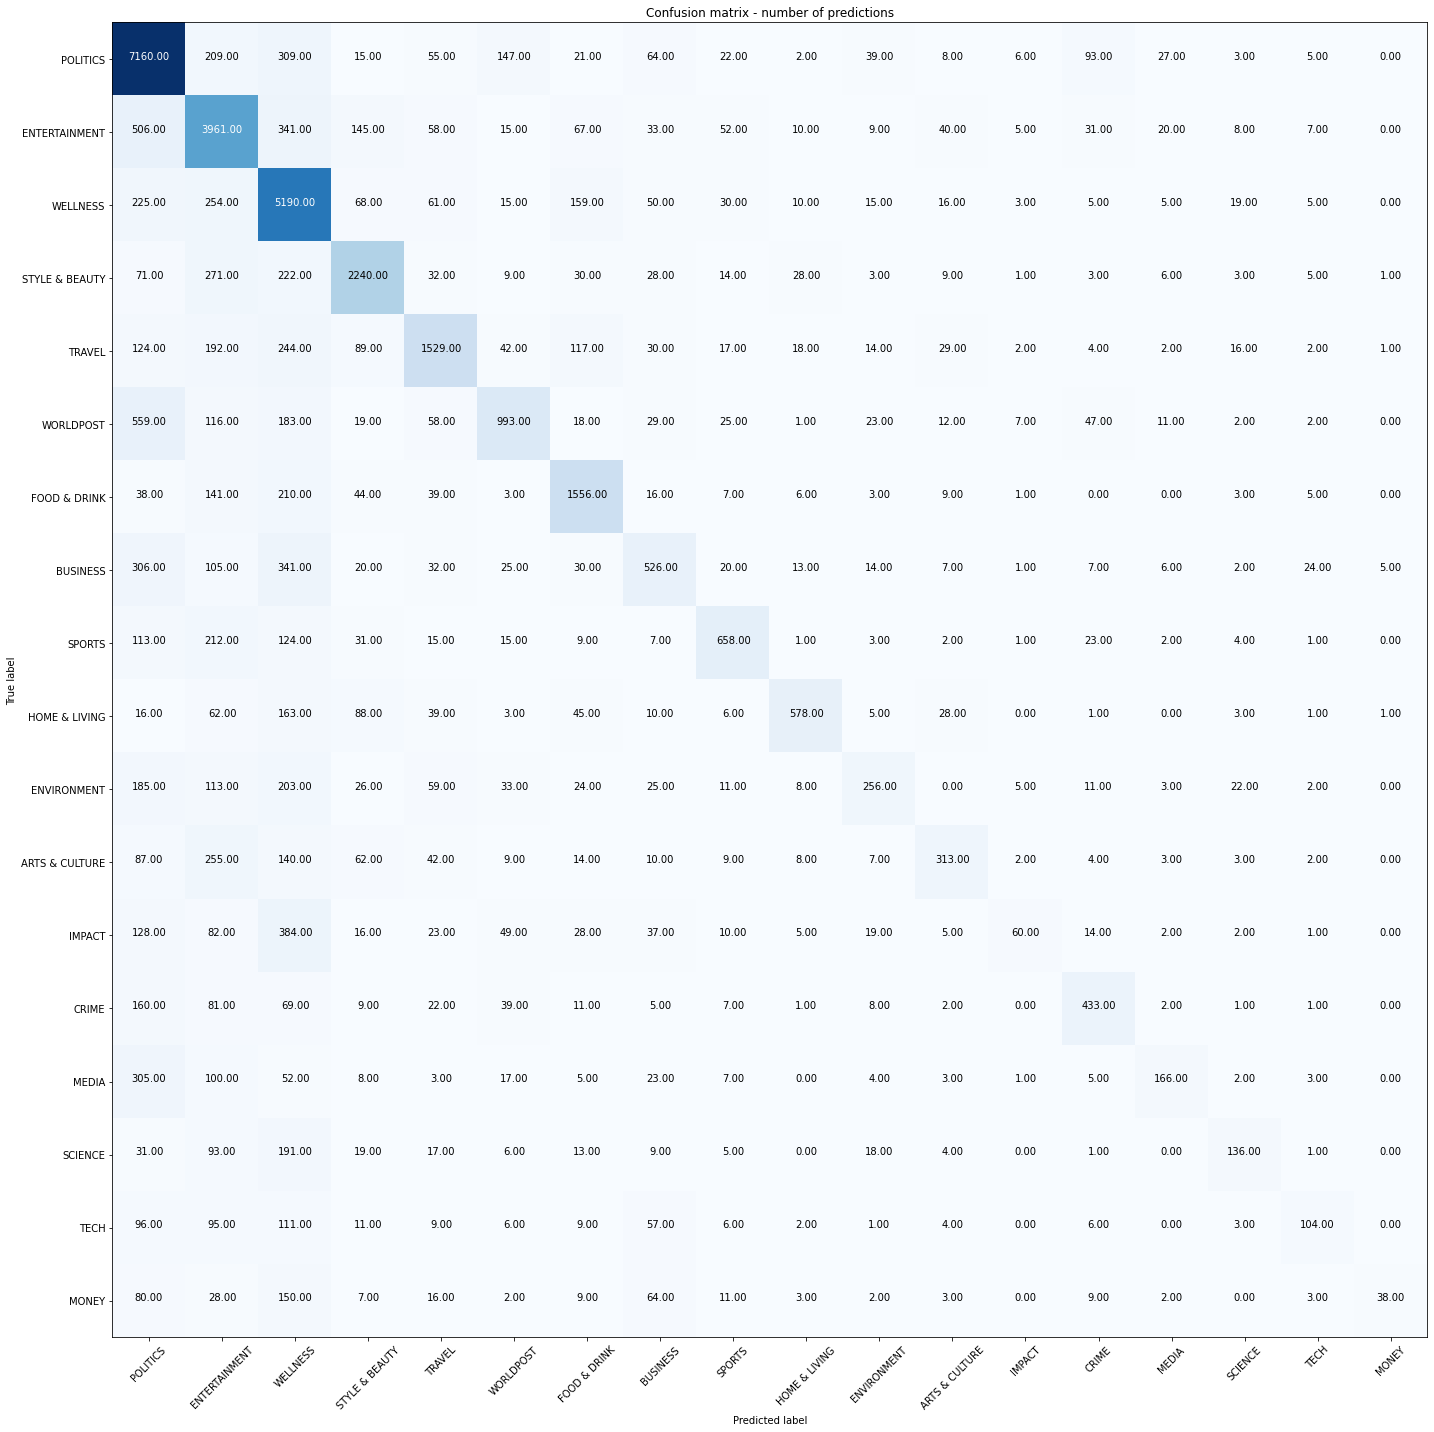

In [113]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# SGDClassifier

In [114]:
sgdc_model=SGDClassifier()

## Bag of words ngram (1,1) stemmed data

In [115]:
X_train,X_test,y_train,y_test= train_test_split(text_bow, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [116]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [117]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow_train_acc = accuracy_score(y_train, y_pred_train)
sgdc_bow_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8287176761094726
ACC test set: 0.7347600185194711


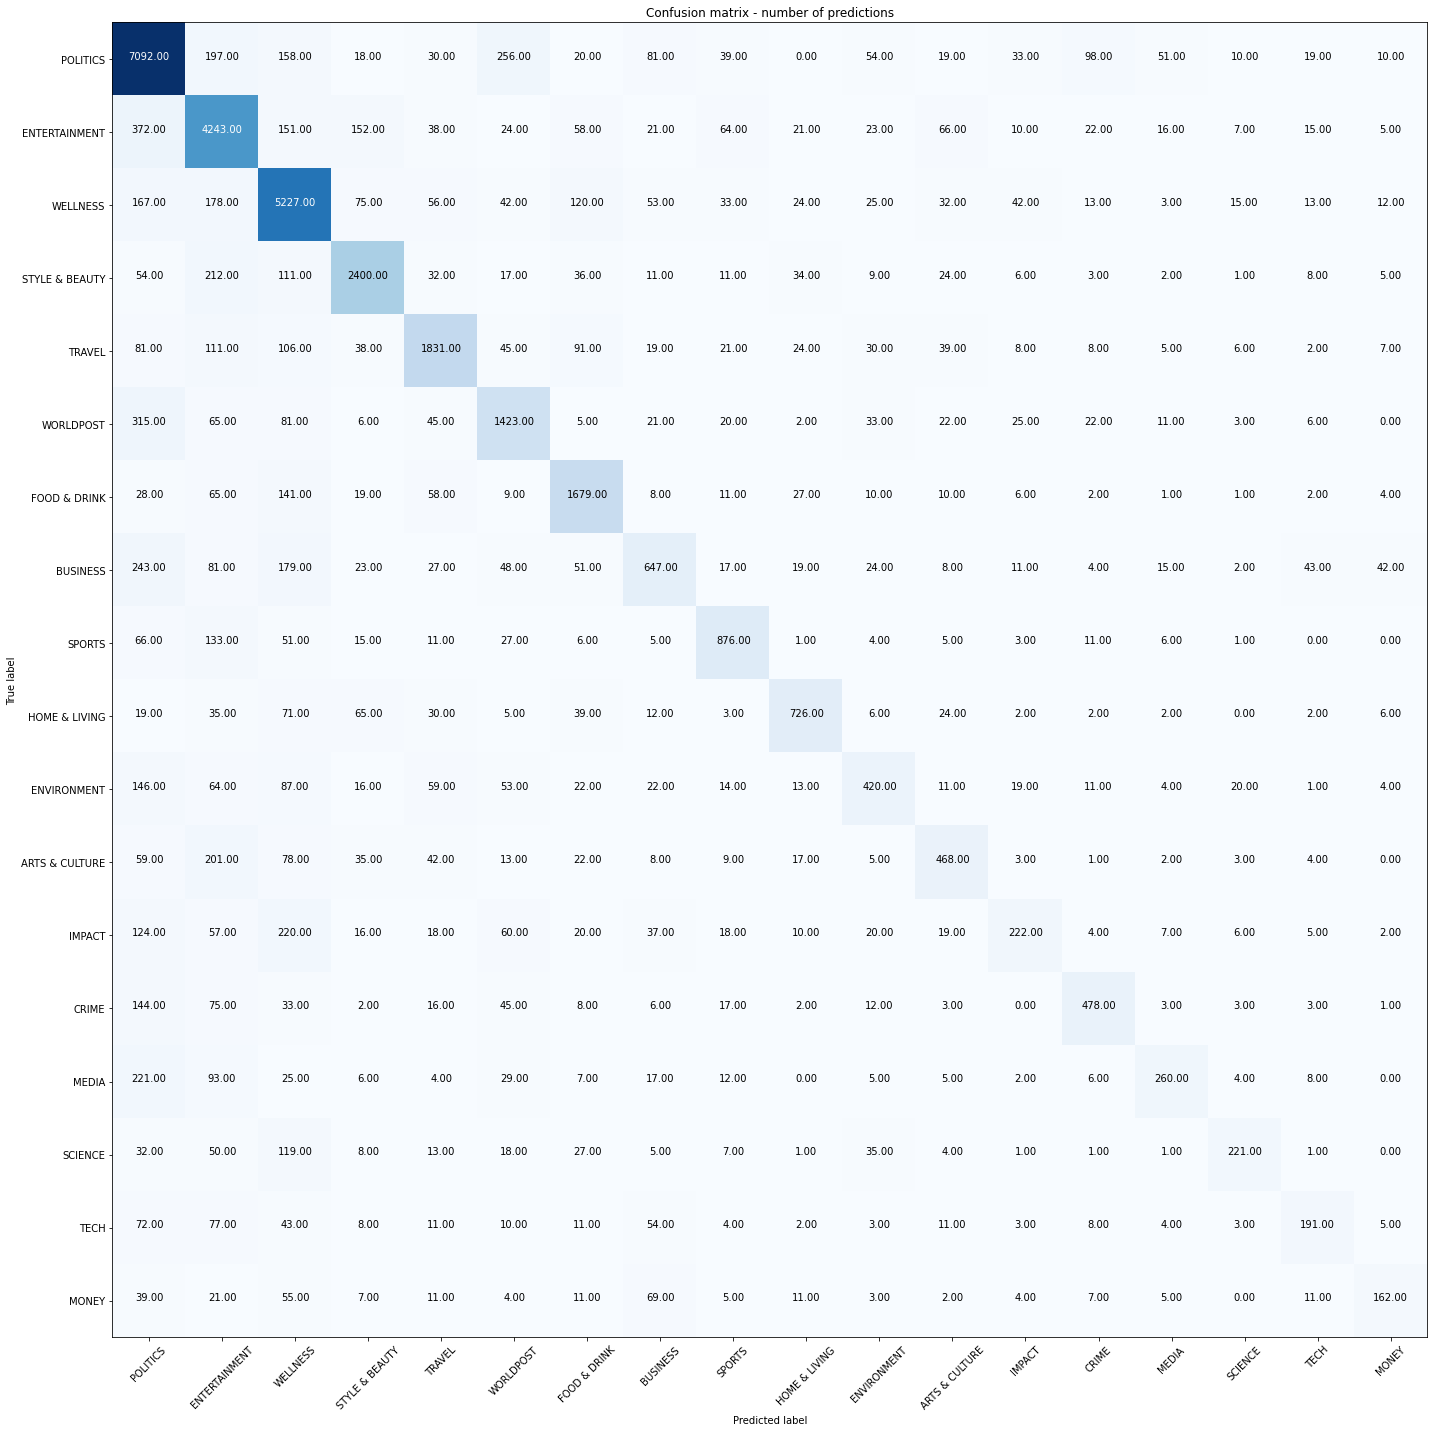

In [118]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,2) stemmed data

In [119]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [120]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [121]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow2_train_acc = accuracy_score(y_train, y_pred_train)
sgdc_bow2_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8890613210782633
ACC test set: 0.745434435927774


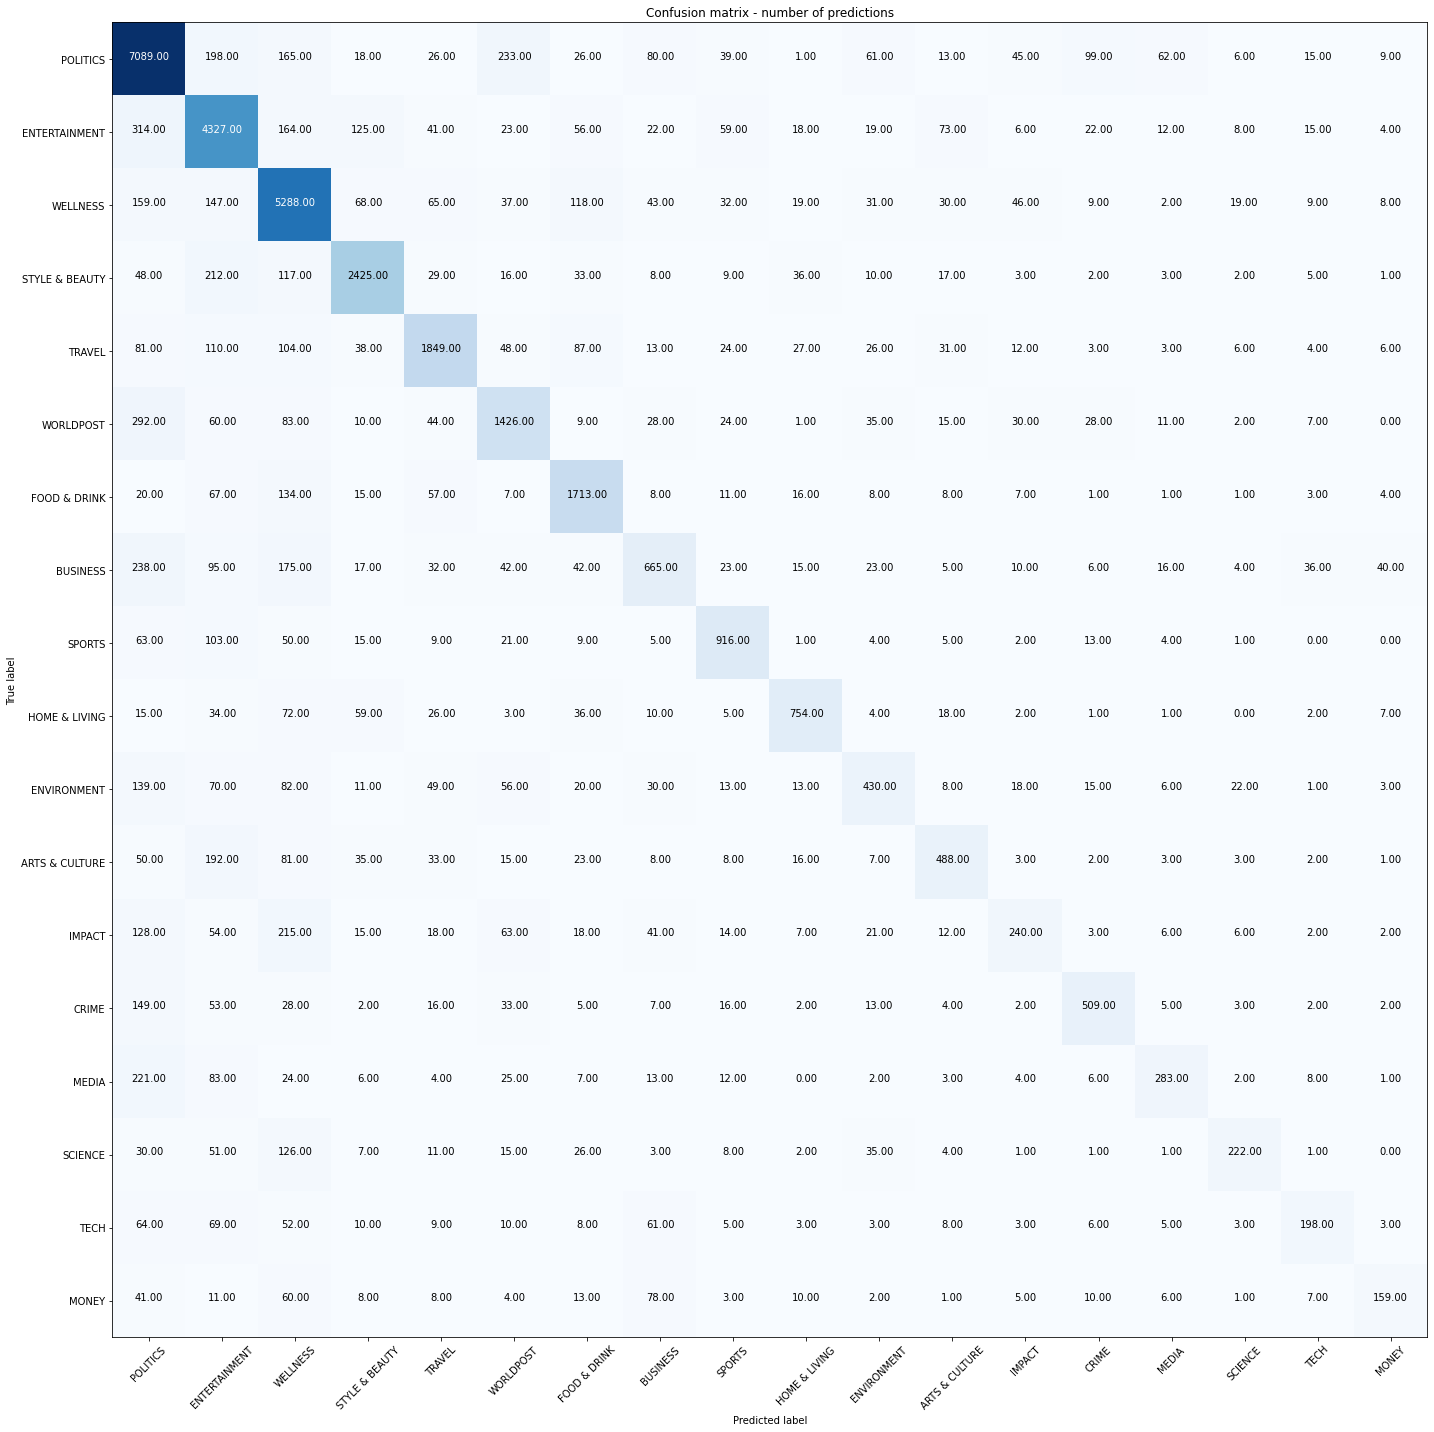

In [122]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,1) lemmatized data

In [123]:
X_train,X_test,y_train,y_test= train_test_split(text_bow_lemma, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [124]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [125]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow_lemma_train_acc = accuracy_score(y_train, y_pred_train)
sgdc_bow_lemma_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.8451797105425612
ACC test set: 0.7360718143937446


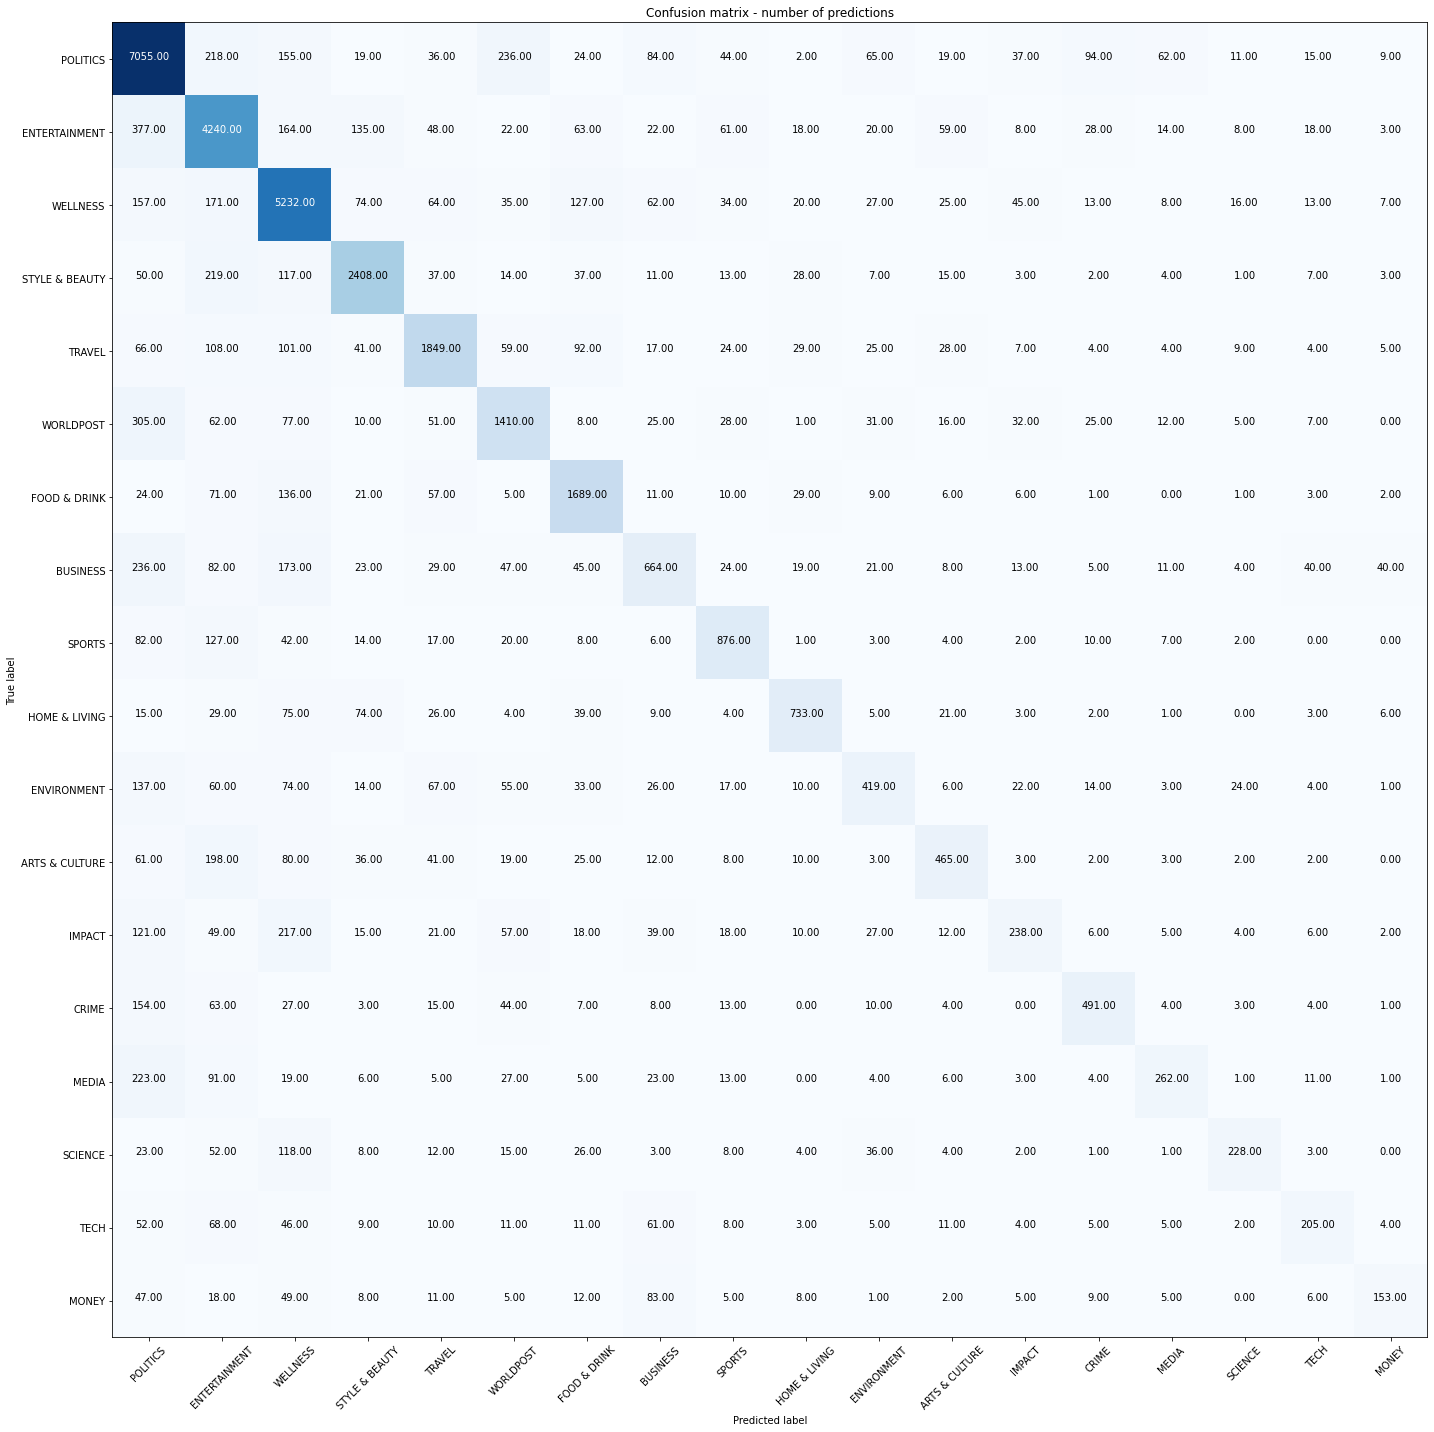

In [126]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## Bag of words ngram (1,2) lemmatized data

In [127]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2_lemma, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [128]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [129]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_bow2_lemma_train_acc = accuracy_score(y_train, y_pred_train)
sgdc_bow2_lemma_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.894591535770629
ACC test set: 0.7463604094860847


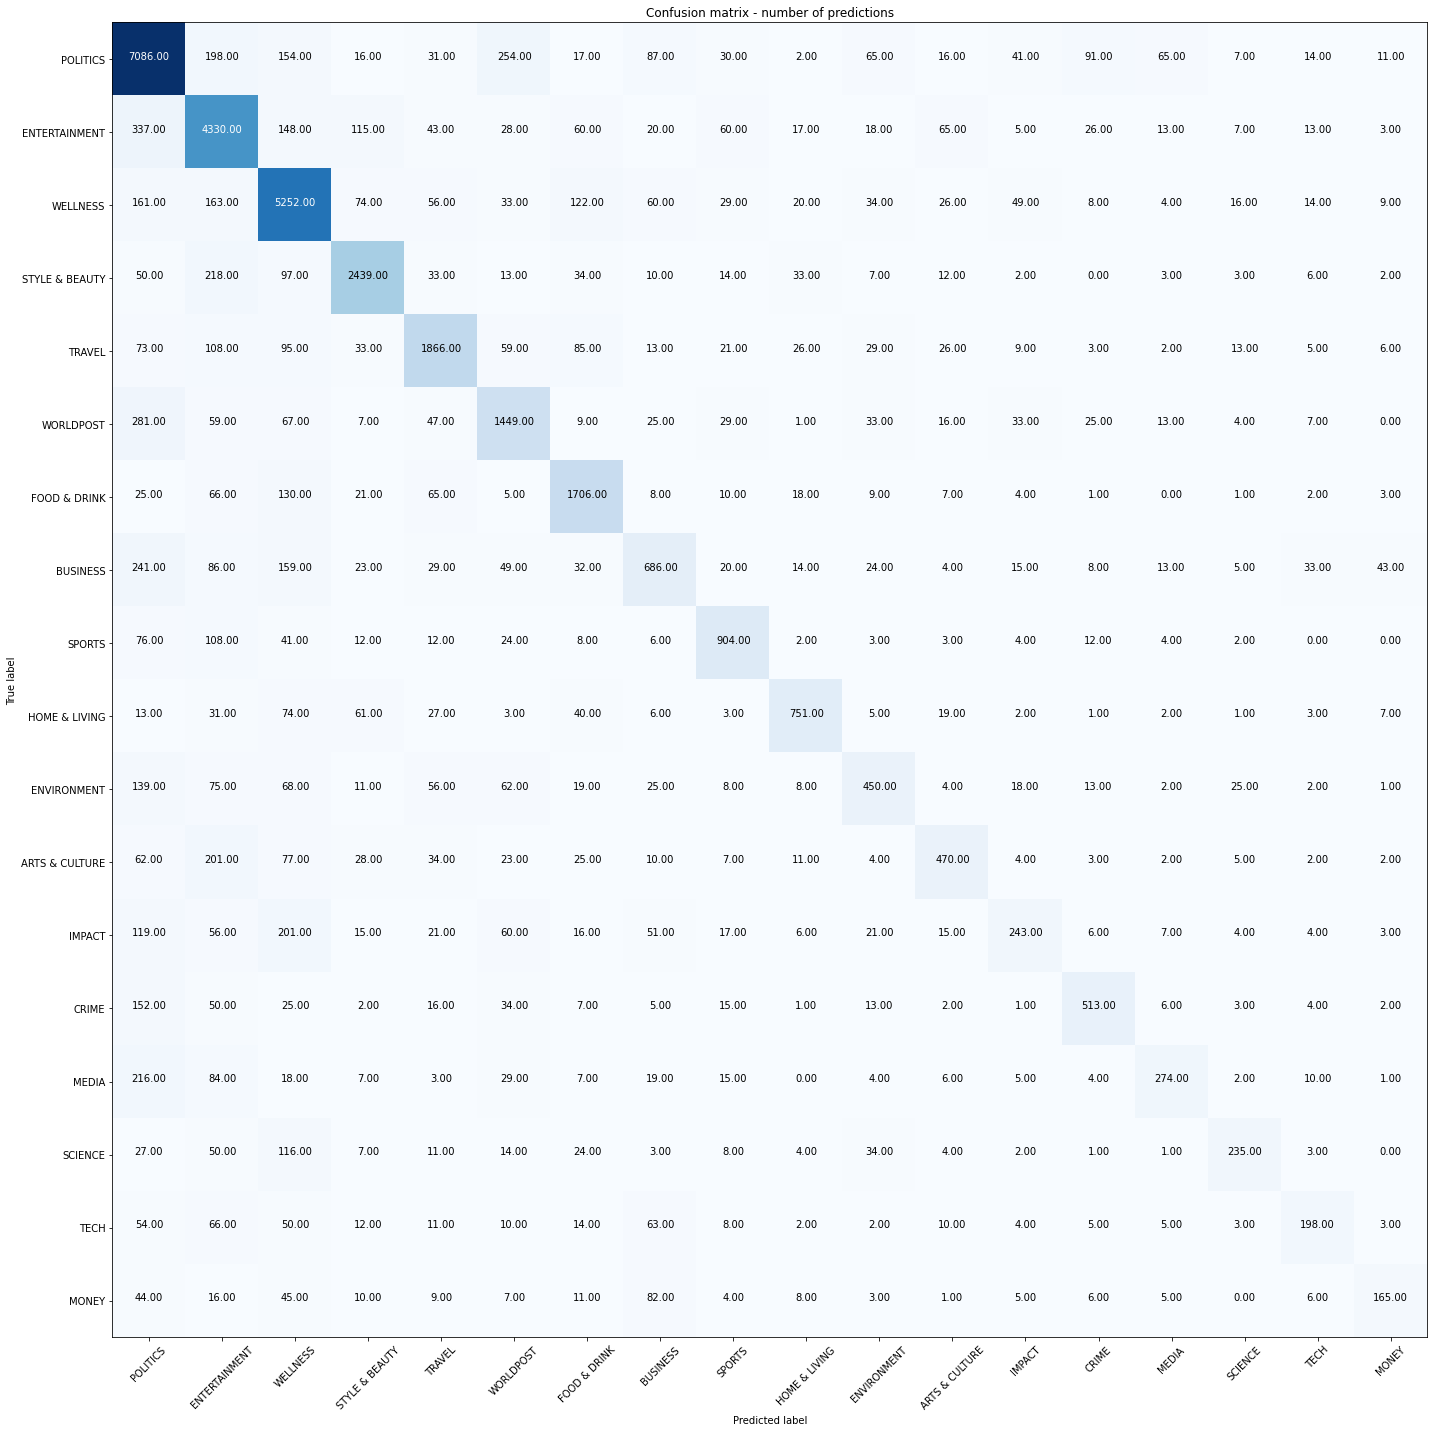

In [130]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

## TFIDF Lemmatized data

In [131]:
X_train,X_test,y_train,y_test= train_test_split(text_tfidf_lemma, df['category'], test_size=0.25, stratify=df['category'], random_state=48)

In [132]:
sgdc_model.fit(X_train,y_train)

SGDClassifier()

In [133]:
y_pred_train=sgdc_model.predict(X_train)
y_pred_test=sgdc_model.predict(X_test)

print('ACC train set: {}'.format(accuracy_score(y_train, y_pred_train)))
print('ACC test set: {}'.format(accuracy_score(y_test, y_pred_test)))

sgdc_tfidf_lemma_train_acc = accuracy_score(y_train, y_pred_train)
sgdc_tfidf_lemma_test_acc = accuracy_score(y_test, y_pred_test)

ACC train set: 0.7661533712874683
ACC test set: 0.719147075466845


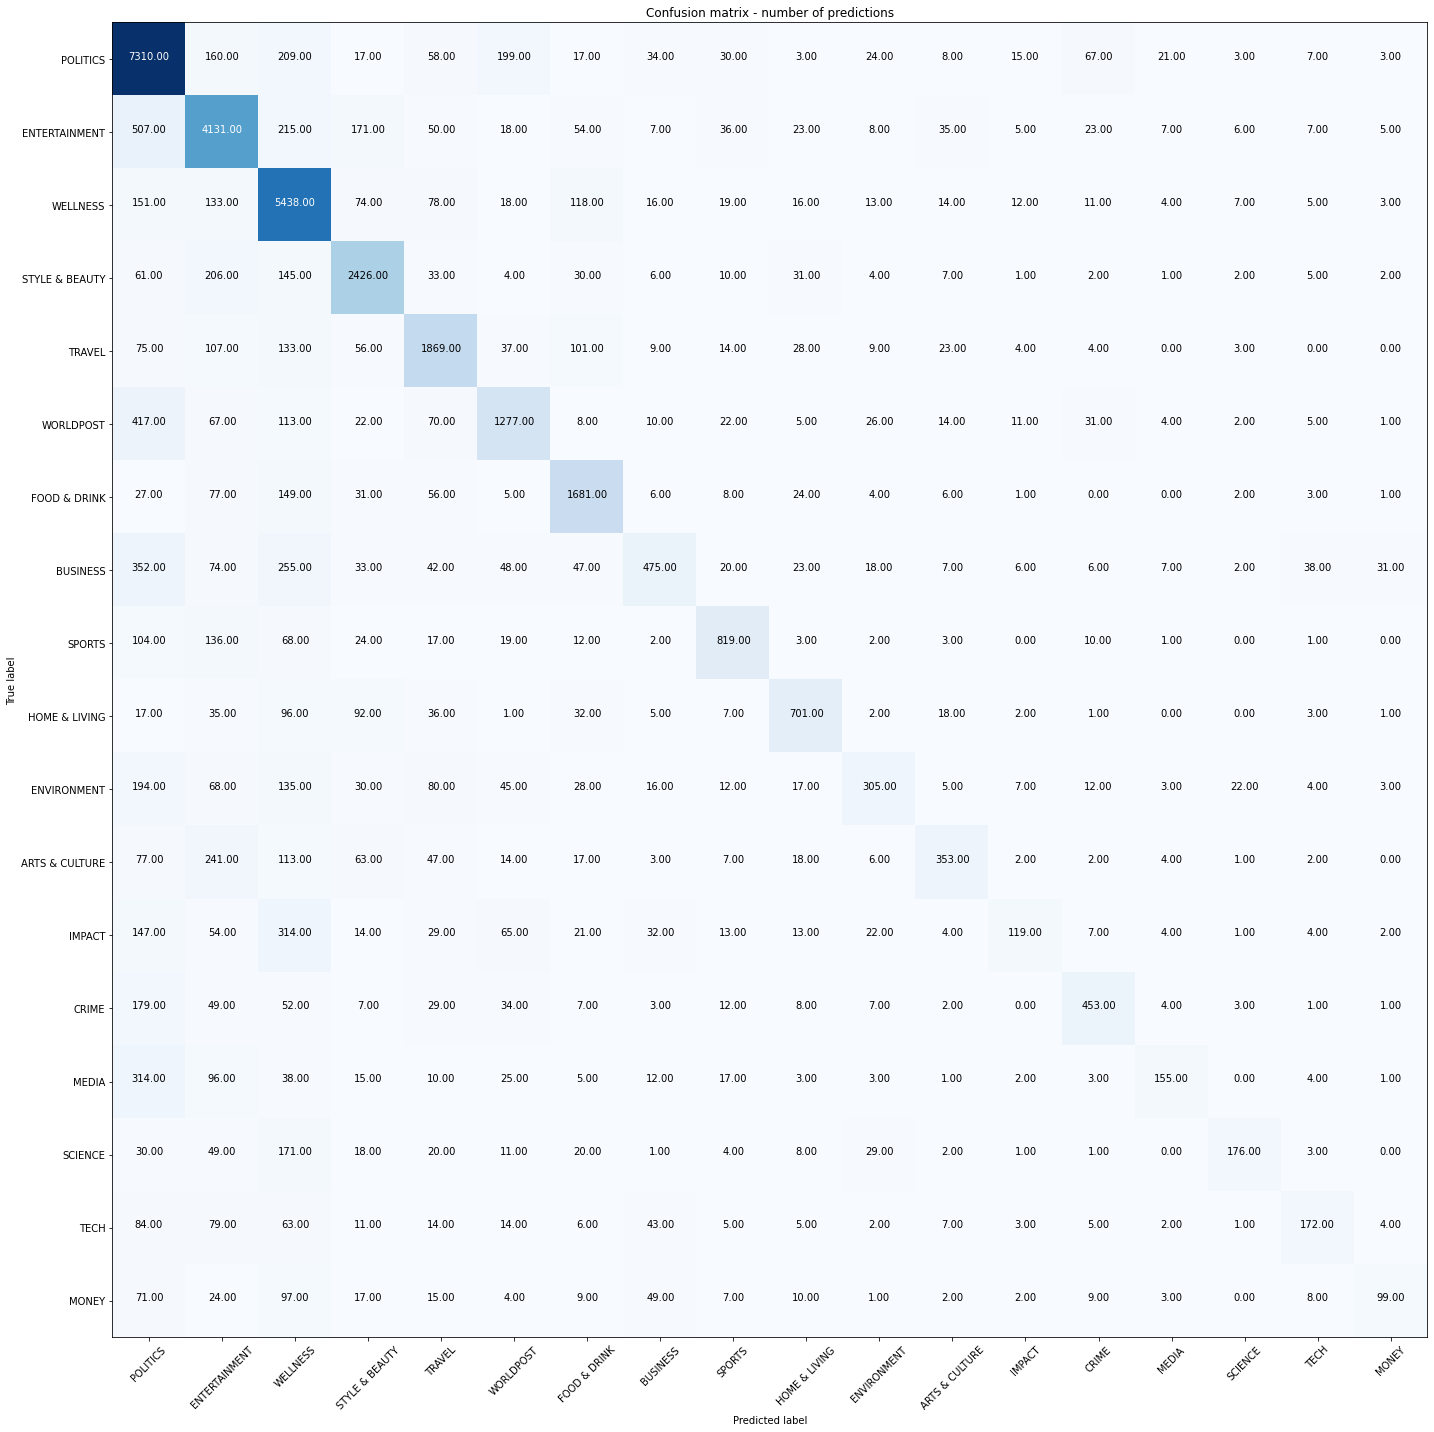

In [134]:
labels=['POLITICS','ENTERTAINMENT','WELLNESS','STYLE & BEAUTY','TRAVEL','WORLDPOST','FOOD & DRINK', 'BUSINESS','SPORTS', 'HOME & LIVING', 'ENVIRONMENT','ARTS & CULTURE','IMPACT','CRIME','MEDIA','SCIENCE','TECH','MONEY']

cm = confusion_matrix(y_test, y_pred_test, labels=labels)

cmap=plt.cm.Blues
plt.figure(figsize=(20,20))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix - number of predictions')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black"
    )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Results



In [146]:
print('MultinomialNB BOW ngram (1,1) accuracy stemm data')
print(f'dla train {nb_bow_train_accuracy}')
print(f'dla test  {nb_bow_test_accuracy}')
print('-'*50)

print('MultinomialNB BOW ngram (1,2) accuracy stemm data')
print(f'dla train {nb_bow2_train_accuracy}')
print(f'dla test  {nb_bow2_test_accuracy}')
print('-'*50)

print('MultinomialNB BOW ngram (1,1) accuracy lemmatized data')
print(f'dla train {nb_bow_lemma_train_acc}')
print(f'dla test  {nb_bow_lemma_test_acc}')
print('-'*50)

print('MultinomialNB BOW ngram (1,2) accuracy lemmatized data')
print(f'dla train {nb_bow2_lemma_train_acc}')
print(f'dla test  {nb_bow2_lemma_test_acc}')
print('-'*50)

print('MultinomialNB Tfidf accuracy on stemmed data')
print(f'dla train {nb_tfidf_stem_train}')
print(f'dla test  {nb_tfidf_stem_test}')
print('-'*50)

print('MultinomialNB Tfidf accuracy on lemmatized data')
print(f'dla train {nb_tfidf_lemma_train}')
print(f'dla test  {nb_tfidf_lemma_test}')
print('-'*50)

print('Logistic Regression BOW ngram(1,1) accuracy on stemmed data')
print(f'dla train {log_reg_bow_stemm_acc_train}')
print(f'dla test  {log_reg_bow_stemm_acc_test}')
print('-'*50)

print('Logistic Regression BOW ngram(1,2) accuracy on stemmed data')
print(f'dla train {log_reg_bow2_stemm_acc_train}')
print(f'dla test  {log_reg_bow2_stemm_acc_test}')
print('-'*50)

print('Logistic Regression BOW ngram(1,1) accuracy on lemmatized data')
print(f'dla train {log_reg_bow_lemma_acc_train}')
print(f'dla test  {log_reg_bow_lemma_acc_test}')
print('-'*50)

print('Logistic Regression BOW ngram(1,2) accuracy on lemmatized data')
print(f'dla train {log_reg_bow2_lemma_acc_train}')
print(f'dla test  {log_reg_bow2_lemma_acc_test}')
print('-'*50)

print('SGDClassifier BOW ngram(1,1) accuracy on stemmed data')
print(f'dla train {sgdc_bow_train_acc}')
print(f'dla test  {sgdc_bow_test_acc}')
print('-'*50)

print('SGDClassifier BOW ngram(1,2) accuracy on stemmed data')
print(f'dla train {sgdc_bow2_train_acc}')
print(f'dla test  {sgdc_bow2_test_acc}')
print('-'*50)

print('SGDClassifier BOW ngram(1,1) accuracy on lemmatized data')
print(f'dla train {sgdc_bow_lemma_train_acc}')
print(f'dla test  {sgdc_bow_lemma_test_acc}')
print('-'*50)

print('SGDClassifier BOW ngram(1,2) accuracy on lemmatized data')
print(f'dla train {sgdc_bow2_lemma_train_acc}')
print(f'dla test  {sgdc_bow2_lemma_test_acc}')
print('-'*50)

MultinomialNB BOW ngram (1,1) accuracy stemm data
dla train 0.7831984361067289
dla test  0.7276608879057564
--------------------------------------------------
MultinomialNB BOW ngram (1,2) accuracy stemm data
dla train 0.8122384937238494
dla test  0.7332681722310819
--------------------------------------------------
MultinomialNB BOW ngram (1,1) accuracy lemmatized data
dla train 0.7950305233555114
dla test  0.7321107052831936
--------------------------------------------------
MultinomialNB BOW ngram (1,2) accuracy lemmatized data
dla train 0.8184546265175938
dla test  0.7358403210041669
--------------------------------------------------
MultinomialNB Tfidf accuracy on stemmed data
dla train 0.681613965292544
dla test  0.6490045784248161
--------------------------------------------------
MultinomialNB Tfidf accuracy on lemmatized data
dla train 0.6822398655600521
dla test  0.6456350635320747
--------------------------------------------------
Logistic Regression BOW ngram(1,1) accuracy 

# GridSearch LogisticRegression i MultinomialNB

In [136]:
print('GridSearch Logistic Regression BOW ngram(1,2) accuracy on lemmatized data' )

GridSearch Logistic Regression BOW ngram(1,2) accuracy on lemmatized data


In [141]:
model = LogisticRegression()

params={
    
    'C':[0.01,0.1,1,10,100],
    'multi_class':['multinomial']


}

In [142]:
grid_search_lr = GridSearchCV(model, param_grid=params, cv=5, )

In [143]:
X_train,X_test,y_train,y_test= train_test_split(text_bow2_lemma,df['category'], test_size=0.25, stratify=df['category'],random_state=48)

In [144]:
grid_search_lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['multinomial']})

In [145]:
print('grid search best params', grid_search_lr.best_params_)
print('accuracy', grid_search_lr.best_score_)
                              

grid search best params {'C': 1, 'multi_class': 'multinomial'}
accuracy 0.7376448914087302
